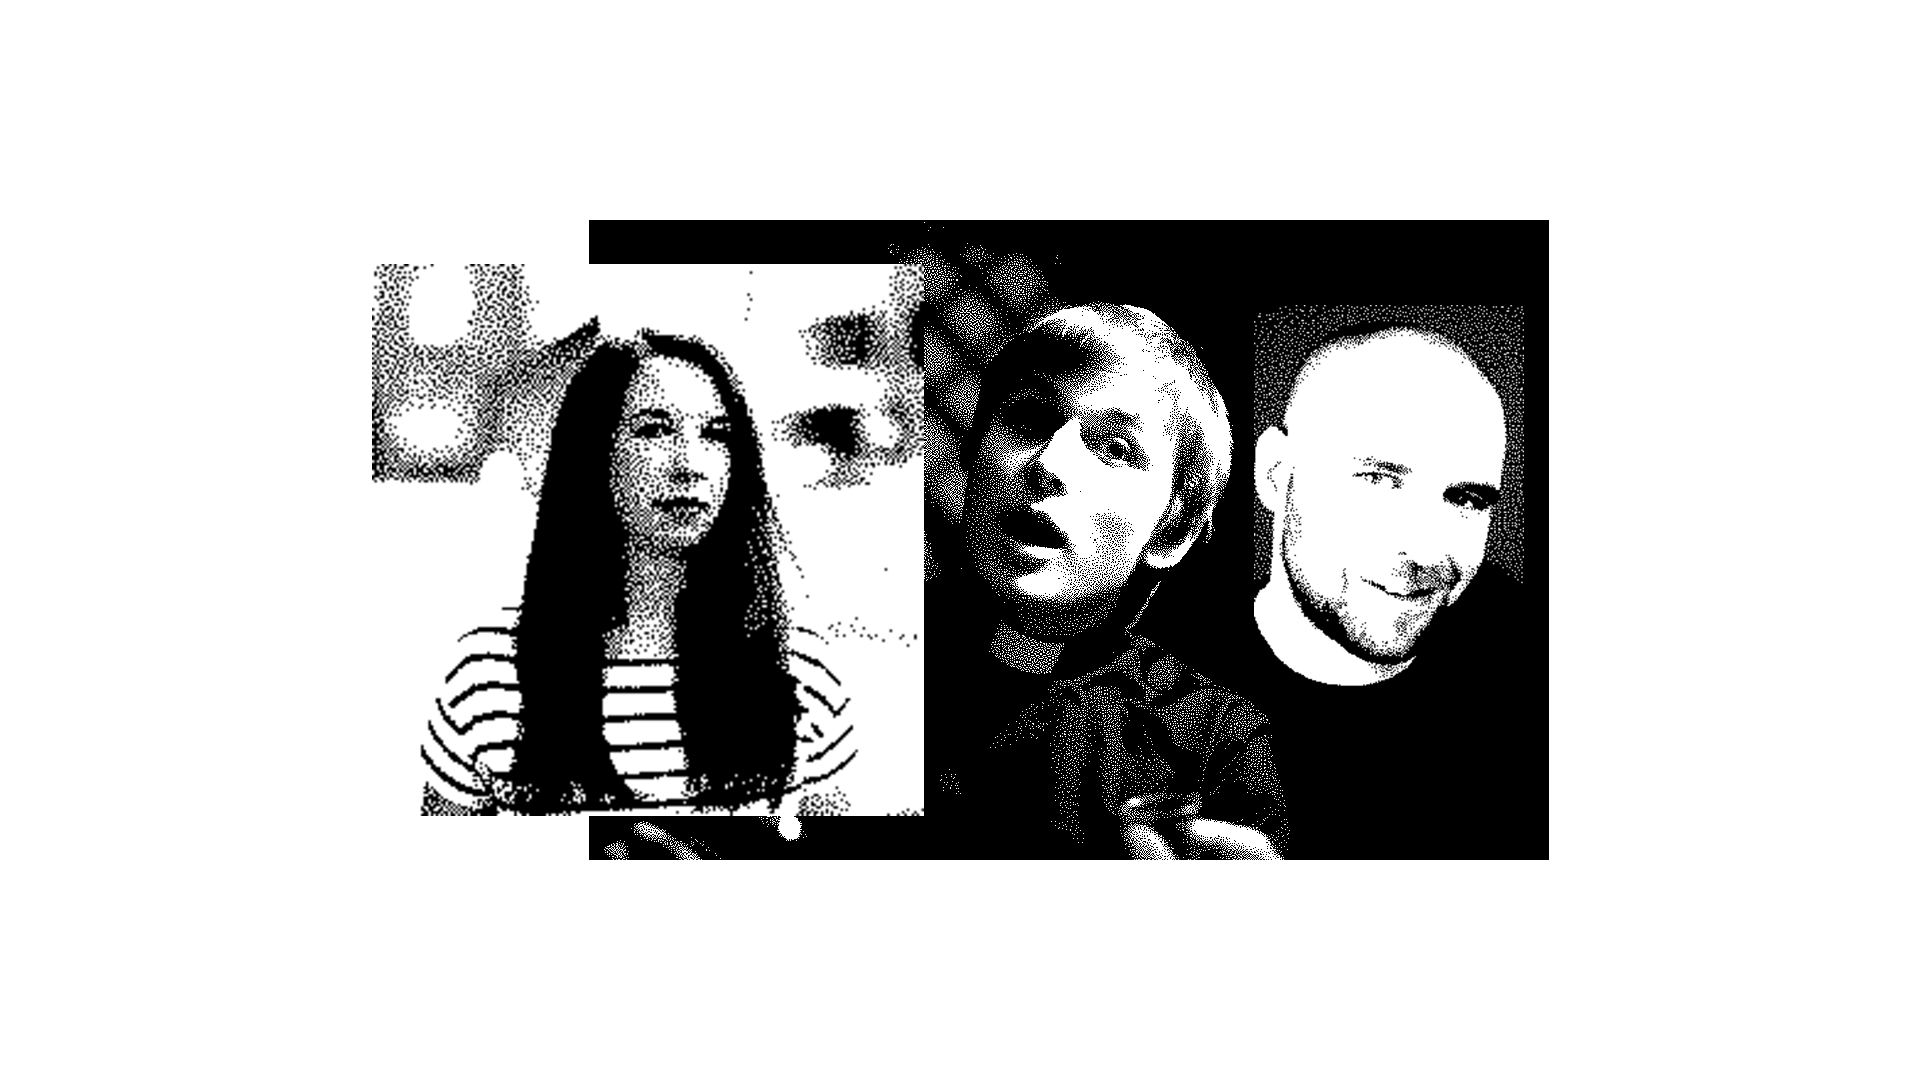


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




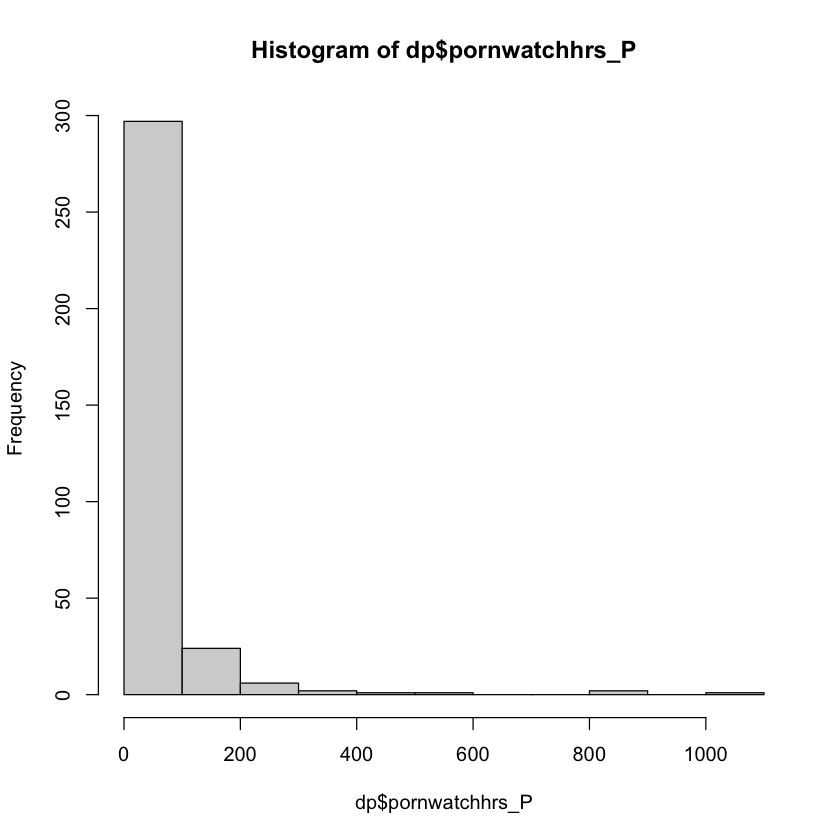

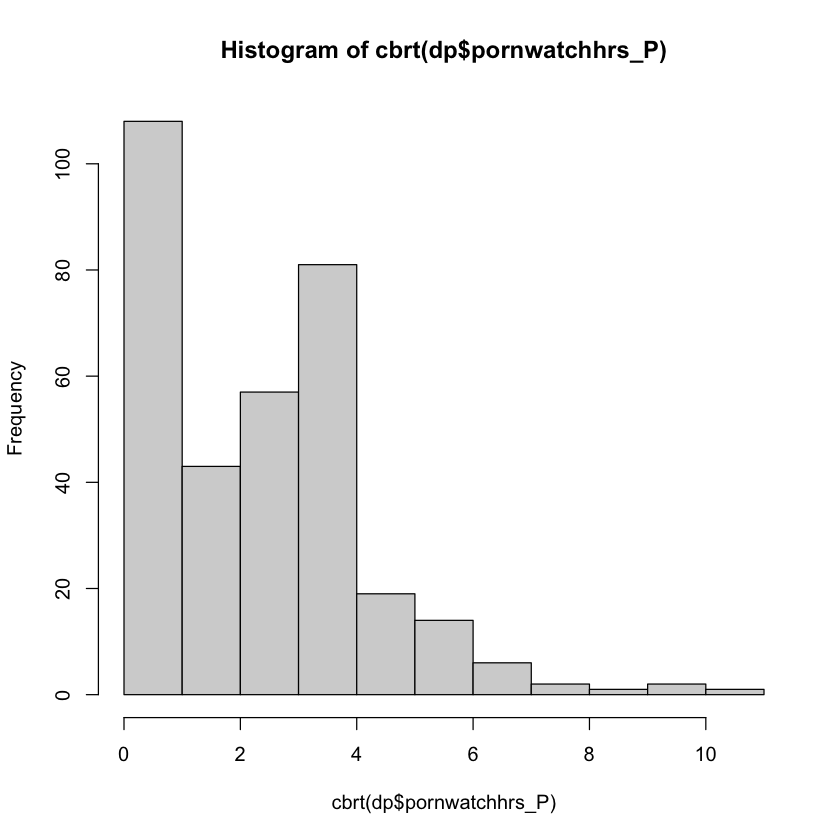

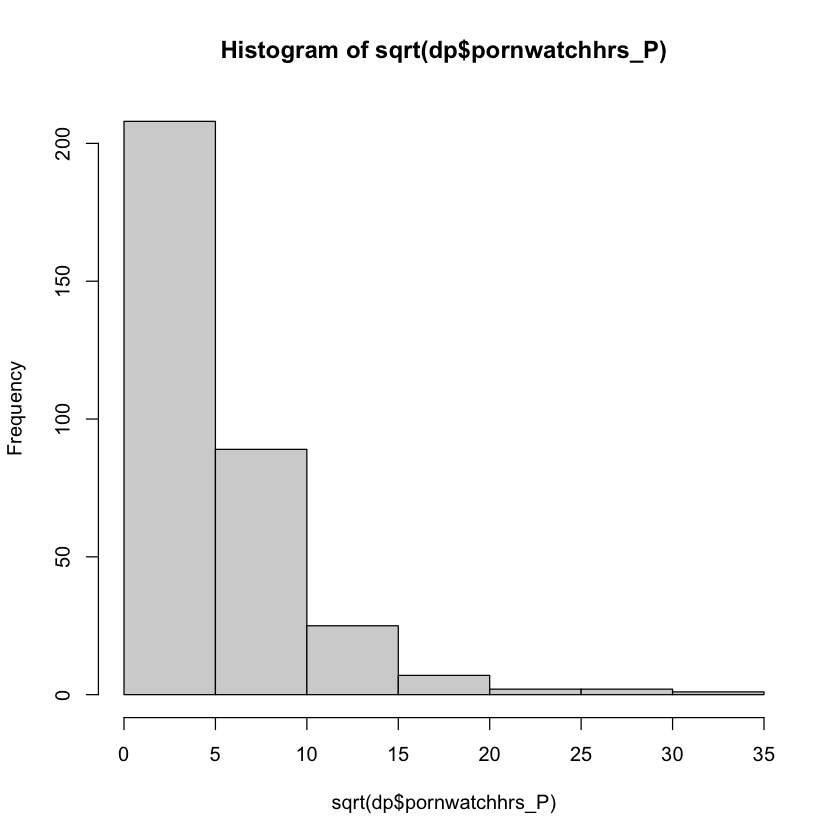

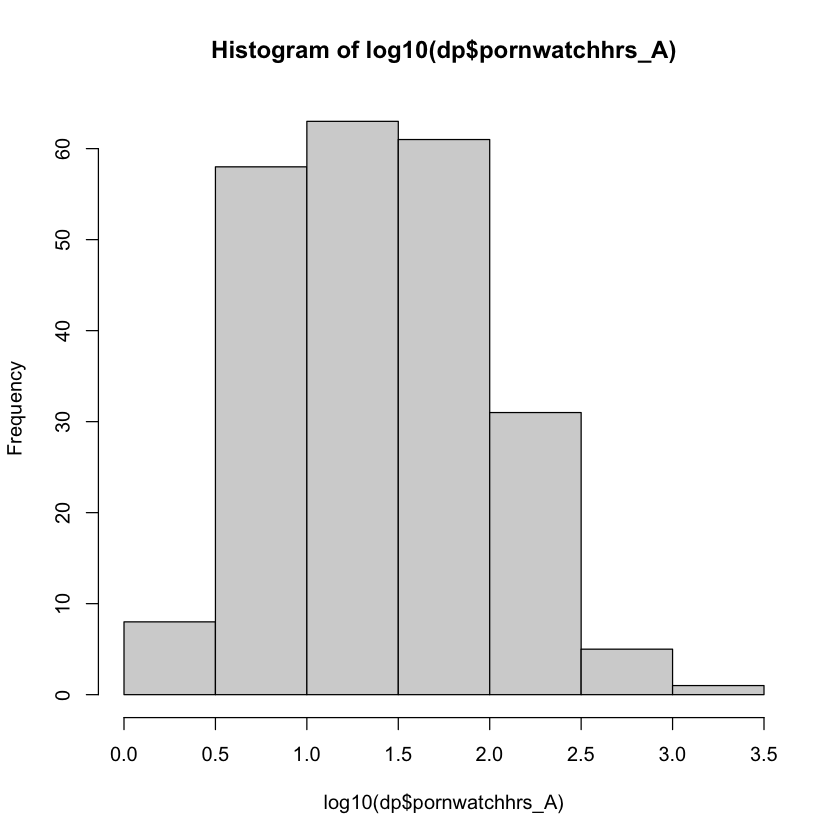

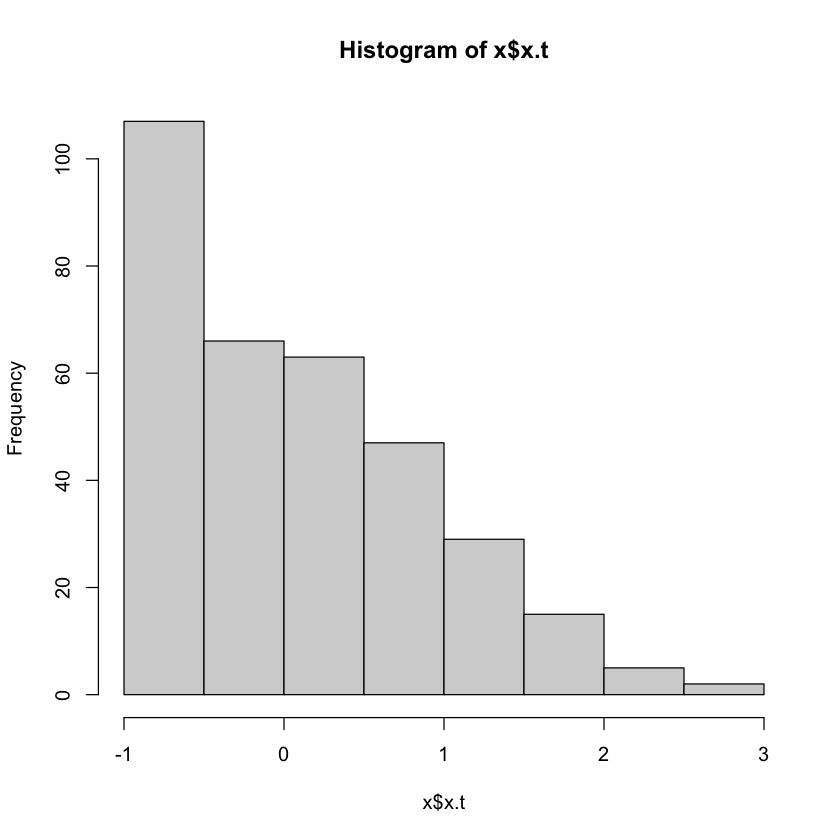

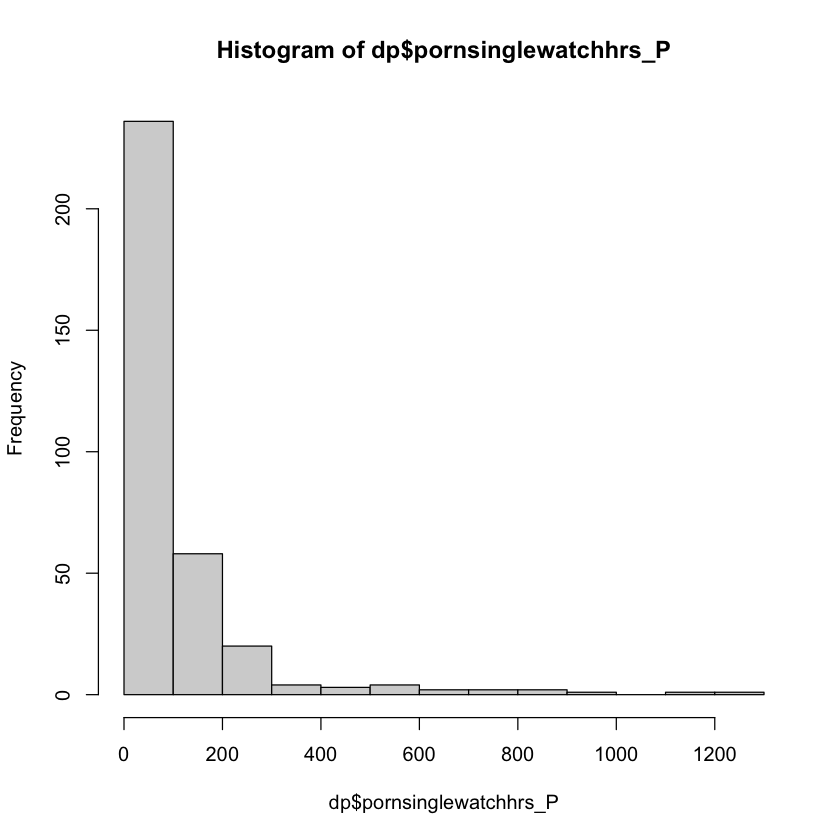

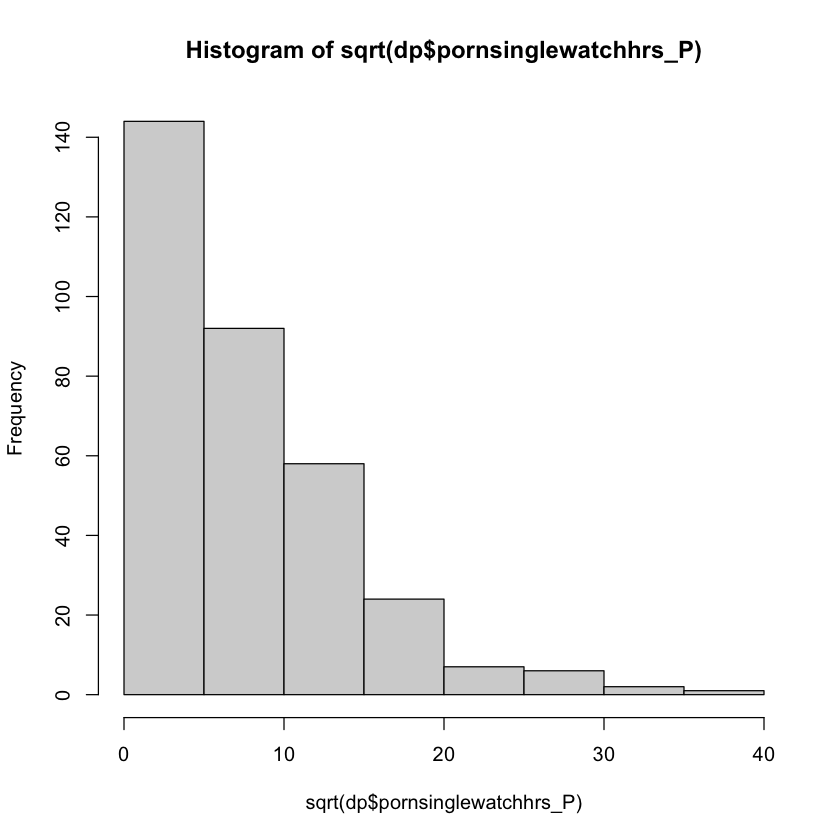

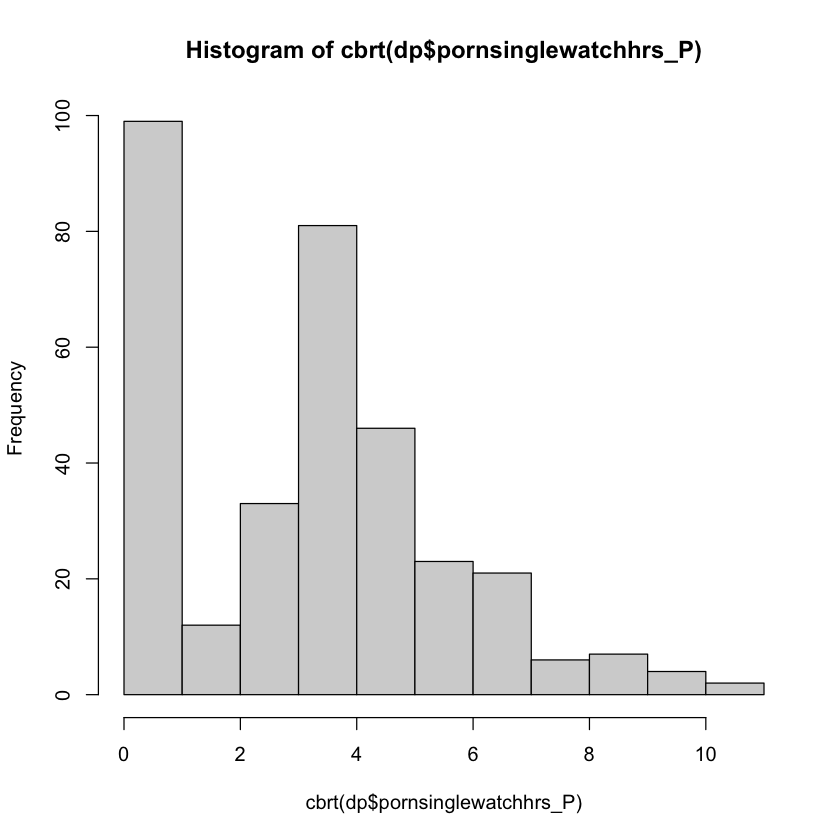

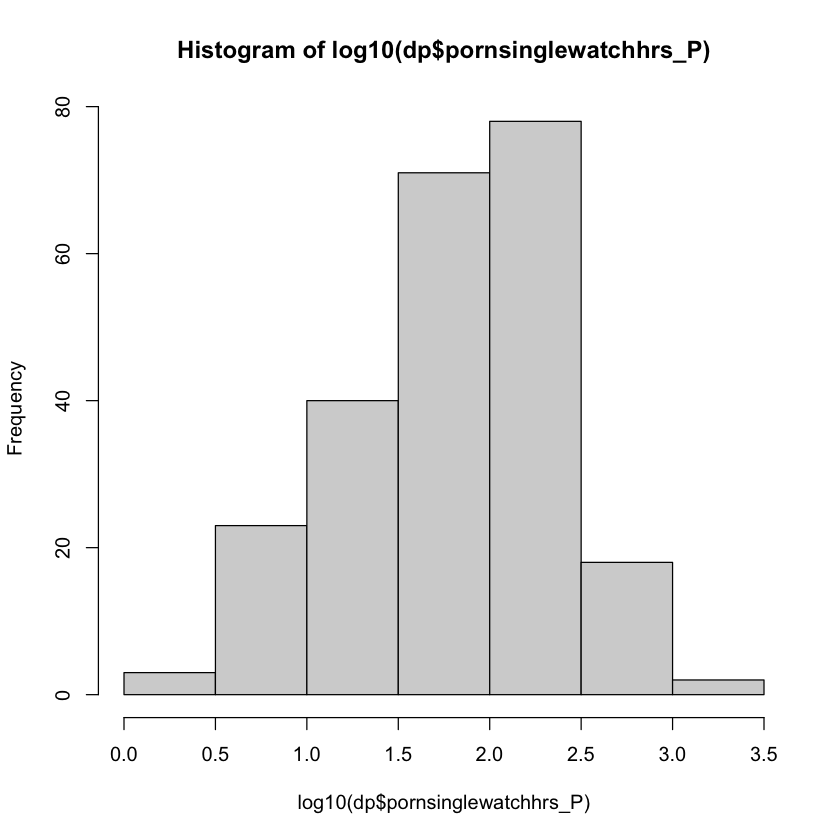

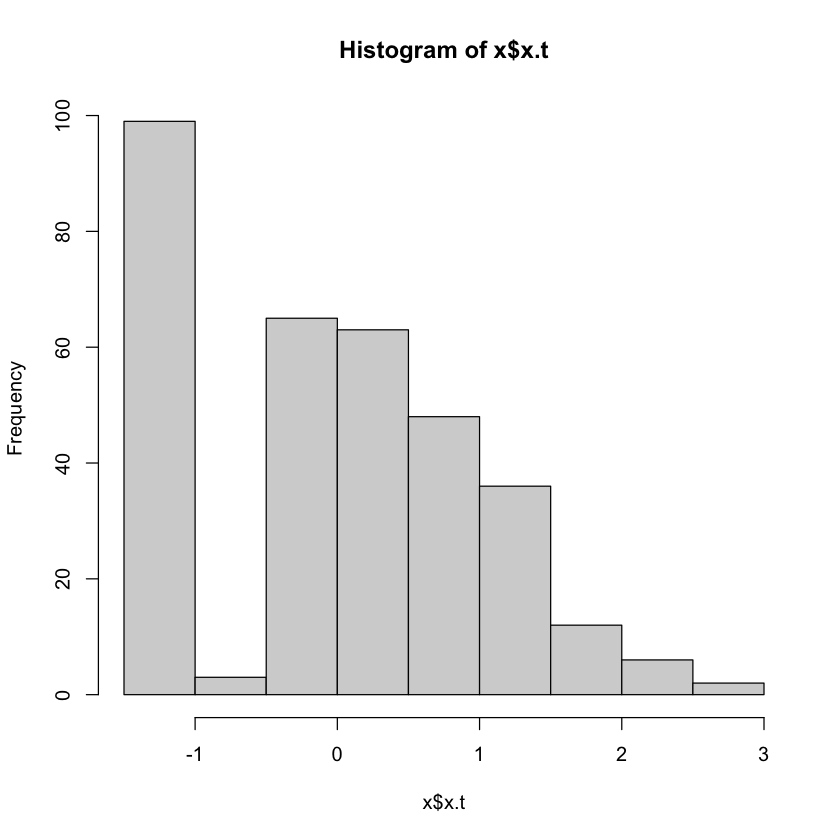

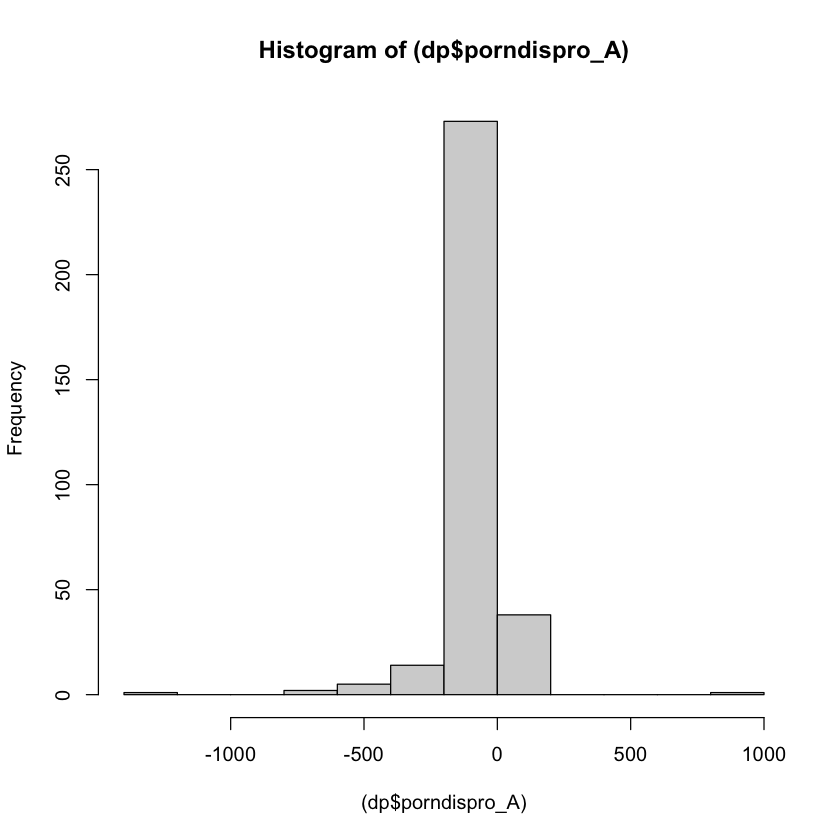

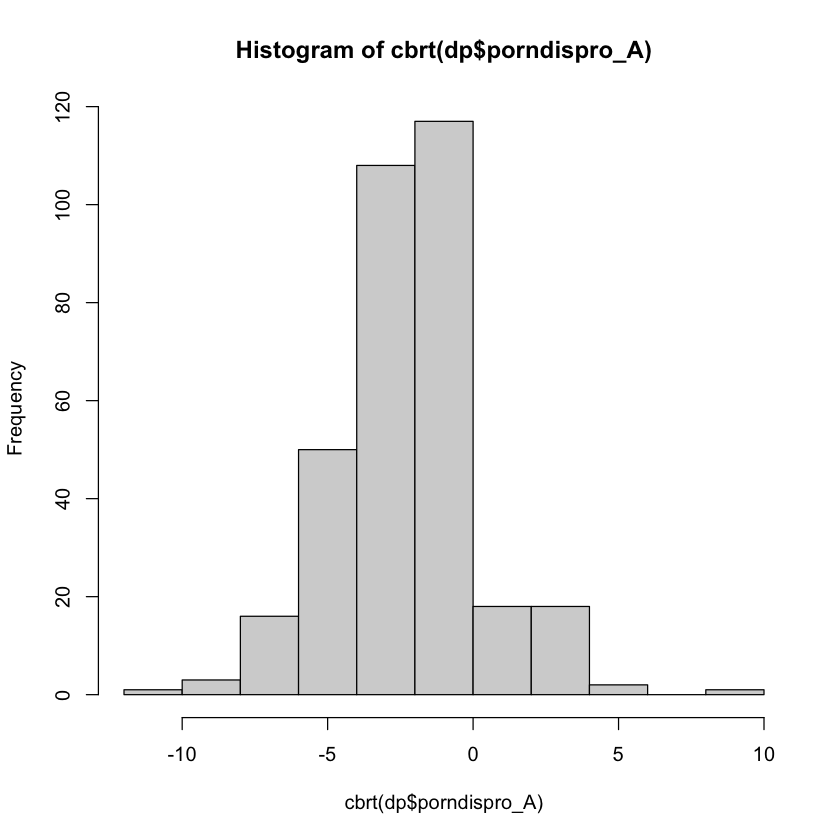

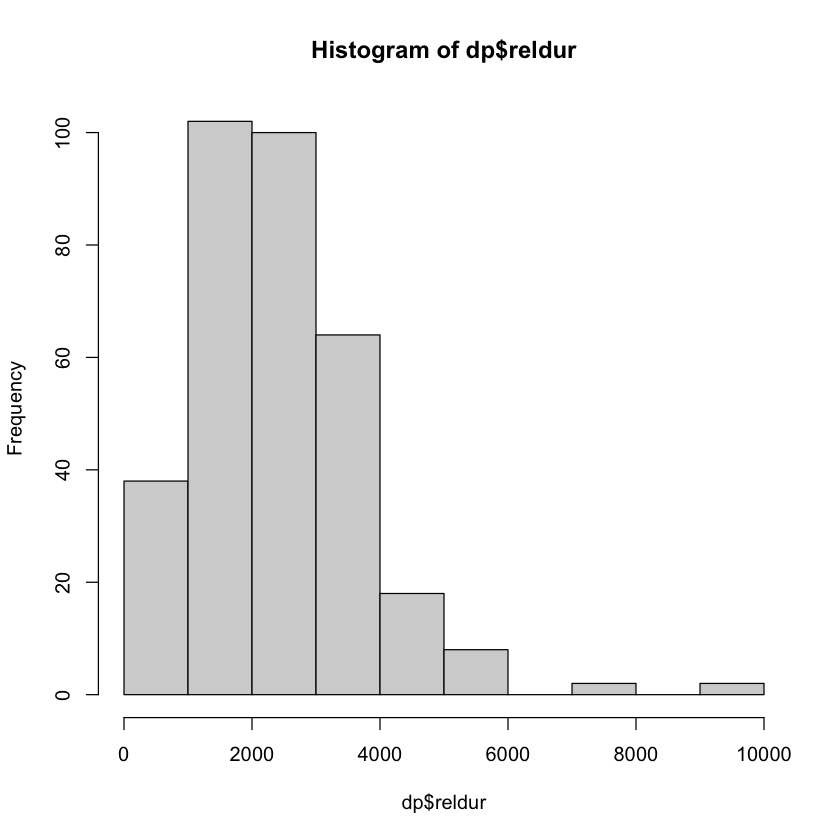

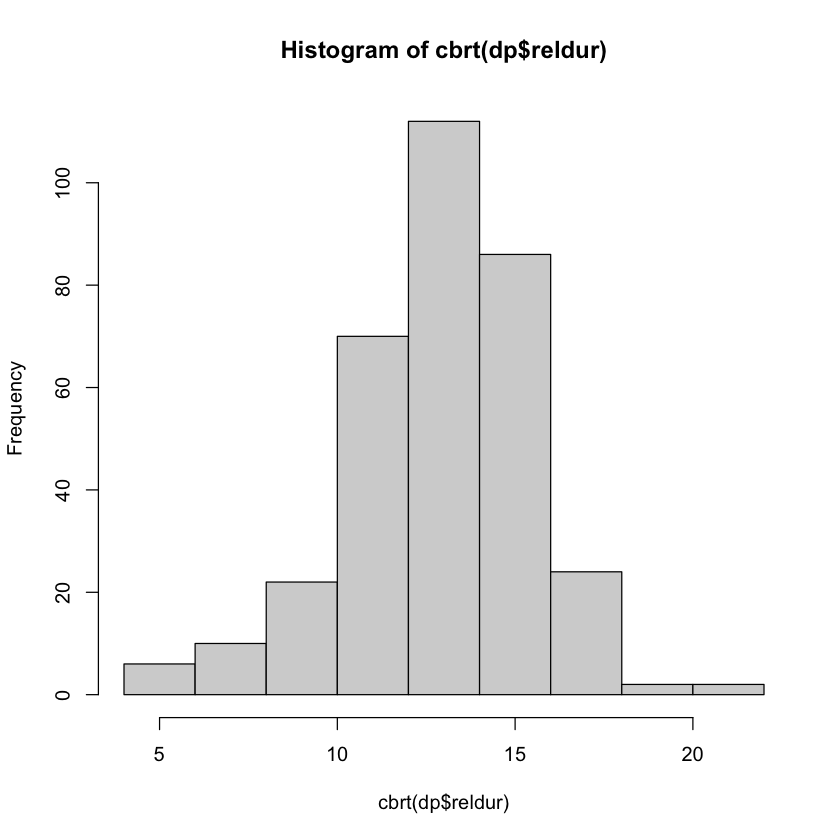

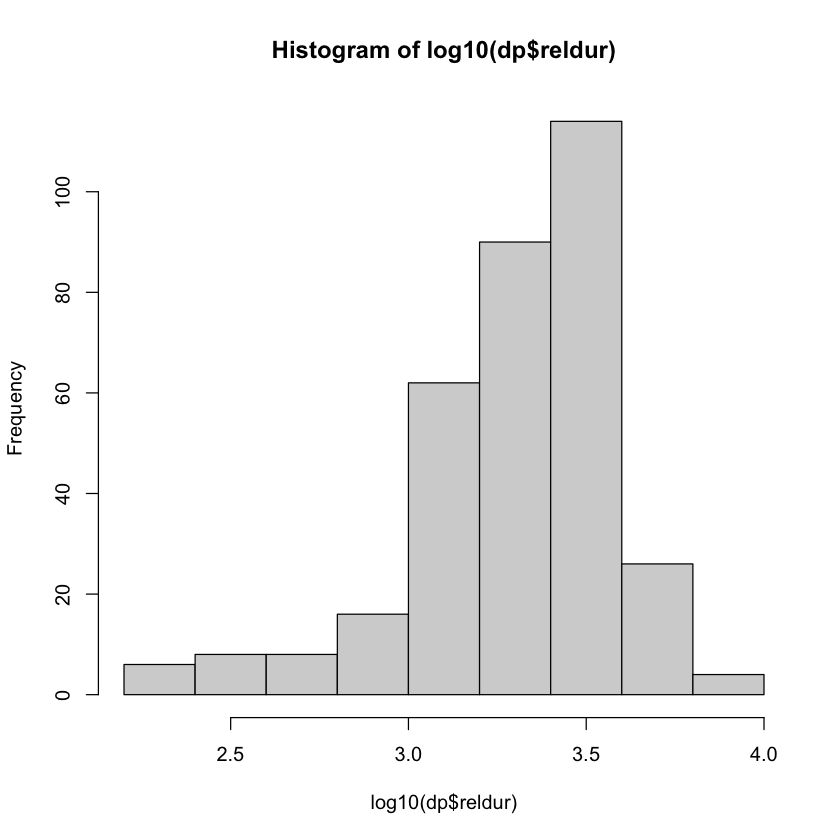

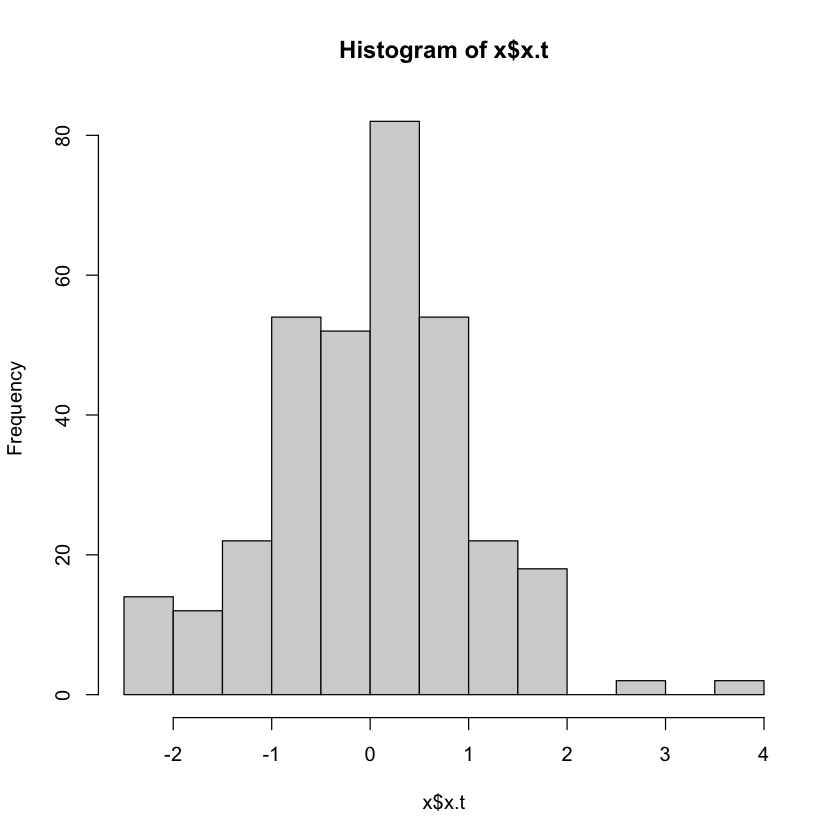

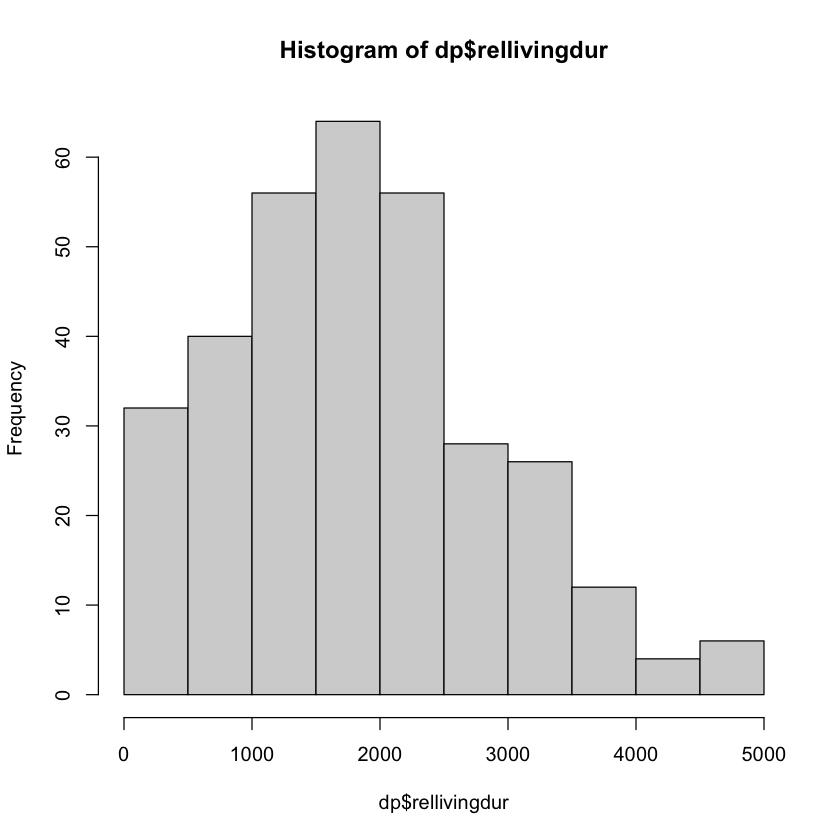

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList


Loading required package: parallel



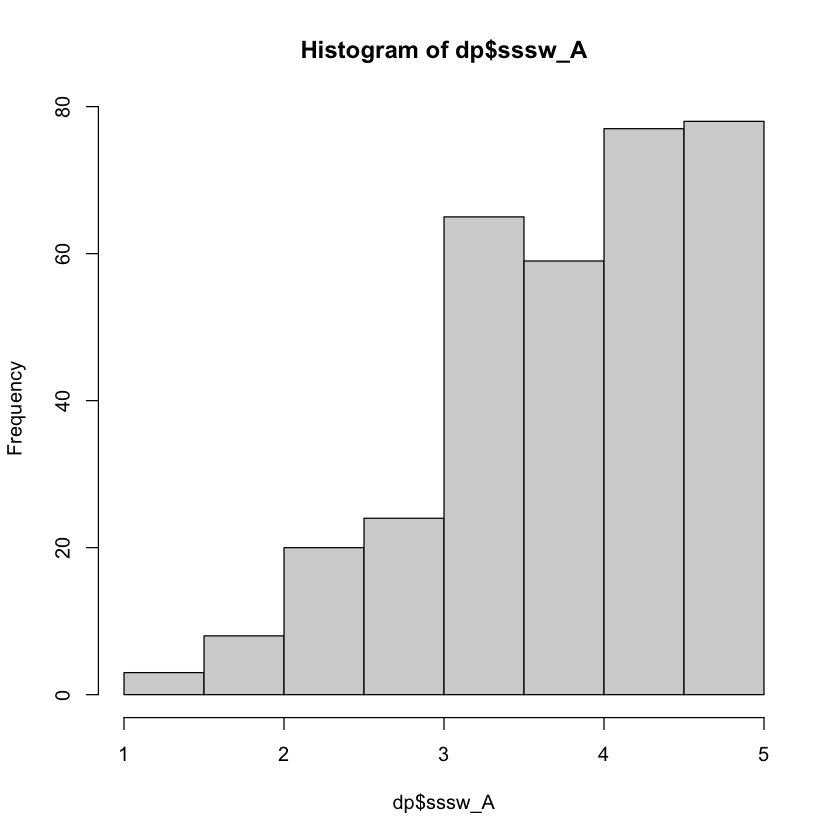

In [28]:
par(bg="white")
source("read_porno.R")
library("car")
library(tidyverse)
library(predictmeans)



Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ norm_pornsinglewatchhrs_A + norm_pornsinglewatchhrs_P 
  Data: dp 
      AIC      BIC   logLik
  813.966 833.0217 -401.983

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7336479 

Coefficients:
                                Value  Std.Error   t-value p-value
(Intercept)                0.25313344 0.11580583  2.185844  0.0295
norm_pornsinglewatchhrs_A -0.02371640 0.00733198 -3.234651  0.0013
norm_pornsinglewatchhrs_P -0.01261262 0.00733198 -1.720220  0.0863

 Correlation: 
                          (Intr) nrm__A
norm_pornsinglewatchhrs_A -0.710       
norm_pornsinglewatchhrs_P -0.710  0.609

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.29266553 -0.82530878  0.06022545  0.81355625  1.81669929 

Residual standard error: 0.9780255 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + norm_pornsinglewatchhrs_A:sex_A + norm_pornsinglewatchhrs_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  809.5535 843.8538 -395.7767

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7416221 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.064161 

Coefficients:
                                           Value  Std.Error   t-value p-value
sex_AFemale                            0.2724773 0.12339656  2.208143  0.0279
sex_AMale                              0.3354681 0.13131376  2.554706  0.0111
sex_AFemale:norm_pornsinglewatchhrs_A -0.0136656 0.01371035 -0.996735  0.3196
sex_AMale:norm_pornsinglewatchhrs_A   -0.0415184 0.01206373 -3.441585  0.0007
sex_AFemale:norm_pornsinglewatchhrs_P -0.0254470 0.01133638 -2.244718  0.0255
sex_AMale:norm_pornsingl

[1] "=============================================================================="


call                                                                                                                                                                                                                                                 
apimind gls(model = norm_sssw_A ~ norm_pornsinglewatchhrs_A + norm_pornsinglewatchhrs_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + norm_pornsinglewatchhrs_A:sex_A +     norm_pornsinglewatchhrs_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio p-value   
apimind 1     5  813.9660 833.0217 -401.9830             NA         NA
apimd   2     9  809.5535 843.8538 -395.7767 1 vs 2 12.4125 0.01453347

[1] "=============================================================================="


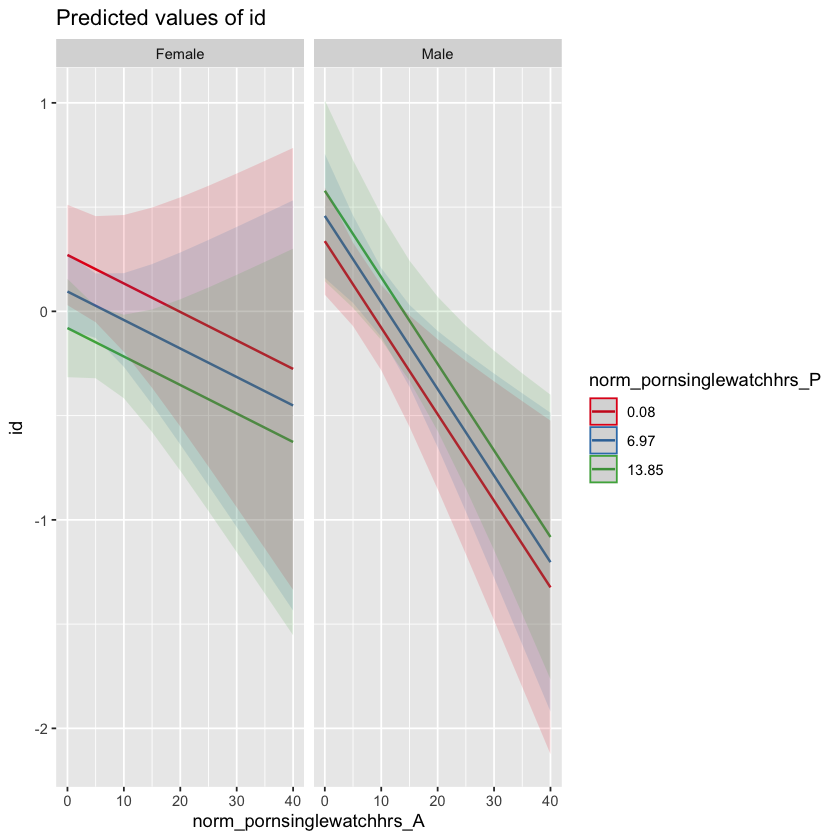

In [255]:

dp$norm_pornsinglewatchhrs_A  = sqrt(dp$pornsinglewatchhrs_A)
dp$norm_pornsinglewatchhrs_P  = sqrt(dp$pornsinglewatchhrs_P)

apimind = gls(norm_sssw_A ~ norm_pornsinglewatchhrs_A + norm_pornsinglewatchhrs_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A + norm_pornsinglewatchhrs_A:sex_A + norm_pornsinglewatchhrs_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + norm_pornsinglewatchhrs_A*sex_A + norm_pornsinglewatchhrs_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("norm_pornsinglewatchhrs_A","norm_pornsinglewatchhrs_P","sex_A"))

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P 
  Data: dp 
       AIC      BIC    logLik
  808.8208 827.8765 -399.4104

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7248055 

Coefficients:
                          Value  Std.Error   t-value p-value
(Intercept)          0.29526324 0.10592441  2.787490  0.0056
norm_pornwatchhrs_A -0.03958847 0.00991073 -3.994508  0.0001
norm_pornwatchhrs_P -0.02623154 0.00991073 -2.646782  0.0085

 Correlation: 
                    (Intr) nrm__A
norm_pornwatchhrs_A -0.677       
norm_pornwatchhrs_P -0.677  0.614

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.32858625 -0.82019439  0.06539648  0.84705914  1.91811634 

Residual standard error: 0.9638609 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + norm_pornwatchhrs_A:sex_A + norm_pornwatchhrs_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  802.4411 836.7413 -392.2205

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7433294 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.086989 

Coefficients:
                                      Value  Std.Error   t-value p-value
sex_AFemale                      0.30457715 0.10964117  2.777945  0.0058
sex_AMale                        0.27837150 0.11917874  2.335748  0.0201
sex_AFemale:norm_pornwatchhrs_A -0.05724832 0.02400459 -2.384891  0.0177
sex_AMale:norm_pornwatchhrs_A   -0.04545101 0.01411979 -3.218957  0.0014
sex_AFemale:norm_pornwatchhrs_P -0.02715931 0.01298982 -2.090814  0.0373
sex_AMale:norm_pornwatchhrs_P    0.00780707 0.02609272  0.299205  

[1] "=============================================================================="


call                                                                                                                                                                                                                                     
apimind gls(model = norm_sssw_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + norm_pornwatchhrs_A:sex_A +     norm_pornwatchhrs_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value    
apimind 1     5  808.8208 827.8765 -399.4104              NA          NA
apimd   2     9  802.4411 836.7413 -392.2205 1 vs 2 14.37976 0.006176643

[1] "=============================================================================="


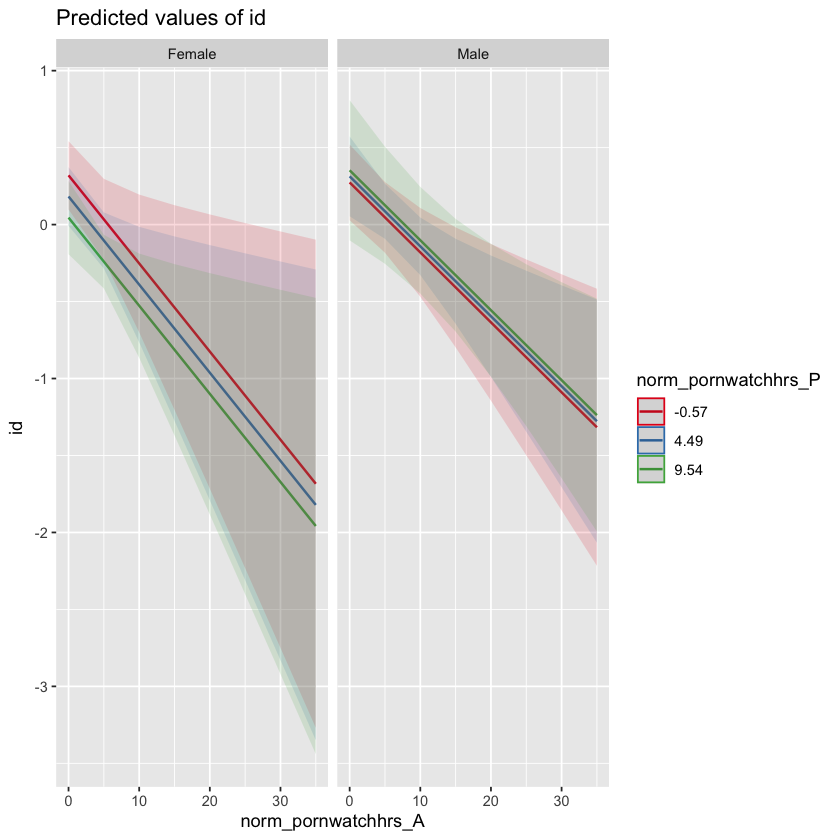

In [256]:
apimind = gls(norm_sssw_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A + norm_pornwatchhrs_A:sex_A + norm_pornwatchhrs_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + norm_pornwatchhrs_A*sex_A + norm_pornwatchhrs_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("norm_pornwatchhrs_A","norm_pornwatchhrs_P","sex_A"))

##### Communication

In [300]:
dp_ = dp %>% filter(sex_A == 'Male')

In [301]:
cor.test(dp_$norm_pornsinglewatchhrs_A, dp_$norm_pornwatchhrs_A, method='spearman')

Warning message in cor.test.default(dp_$norm_pornsinglewatchhrs_A, dp_$norm_pornwatchhrs_A, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  dp_$norm_pornsinglewatchhrs_A and dp_$norm_pornwatchhrs_A
S = 202626, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7389569 


In [298]:
dp_ = dp %>% filter(sex_A == 'Female')
cor.test(dp_$norm_pornsinglewatchhrs_A, dp_$norm_pornwatchhrs_A, method='spearman')

Warning message in cor.test.default(dp_$norm_pornsinglewatchhrs_A, dp_$norm_pornwatchhrs_A, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  dp_$norm_pornsinglewatchhrs_A and dp_$norm_pornwatchhrs_A
S = 310393, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6001208 


In [317]:
dp_ = dp %>% filter(sex_A == 'Female')
m = lm(norm_sssw_A ~ sqrt(pornwatchhrs_A)+sqrt(pornsinglewatchhrs_A)+
       sqrt(pornwatchhrs_P)+sqrt(pornsinglewatchhrs_P), data = dp_)

In [318]:
summary(m)


Call:
lm(formula = norm_sssw_A ~ sqrt(pornwatchhrs_A) + sqrt(pornsinglewatchhrs_A) + 
    sqrt(pornwatchhrs_P) + sqrt(pornsinglewatchhrs_P), data = dp_)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10744 -0.72032  0.02616  0.71706  1.79790 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                 0.334891   0.125003   2.679  0.00814 **
sqrt(pornwatchhrs_A)       -0.064179   0.027816  -2.307  0.02231 * 
sqrt(pornsinglewatchhrs_A)  0.009488   0.016040   0.592  0.55501   
sqrt(pornwatchhrs_P)       -0.021917   0.018769  -1.168  0.24464   
sqrt(pornsinglewatchhrs_P) -0.009088   0.015466  -0.588  0.55761   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9304 on 162 degrees of freedom
Multiple R-squared:  0.09404,	Adjusted R-squared:  0.07167 
F-statistic: 4.204 on 4 and 162 DF,  p-value: 0.002891


Generalized least squares fit by maximum likelihood
  Model: norm_ssswcommunication_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P 
  Data: dp 
       AIC      BIC   logLik
  862.4341 881.4898 -426.217

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.6255161 

Coefficients:
                          Value  Std.Error   t-value p-value
(Intercept)          0.16967836 0.10470482  1.620540  0.1061
norm_pornwatchhrs_A -0.03604691 0.01020805 -3.531224  0.0005
norm_pornwatchhrs_P -0.00177774 0.01020805 -0.174151  0.8619

 Correlation: 
                    (Intr) nrm__A
norm_pornwatchhrs_A -0.650       
norm_pornwatchhrs_P -0.650  0.486

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.54133637 -0.81718586 -0.07847732  0.97839614  1.66294390 

Residual standard error: 0.9814303 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_ssswcommunication_A ~ sex_A + norm_pornwatchhrs_A:sex_A +      norm_pornwatchhrs_P:sex_A - 1 
  Data: dp 
       AIC      BIC    logLik
  859.9529 894.2532 -420.9765

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.6423781 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.105376 

Coefficients:
                                      Value  Std.Error    t-value p-value
sex_AFemale                      0.30811232 0.11070995  2.7830589  0.0057
sex_AMale                        0.03414792 0.12237610  0.2790408  0.7804
sex_AFemale:norm_pornwatchhrs_A -0.05156047 0.02423858 -2.1272064  0.0341
sex_AMale:norm_pornwatchhrs_A   -0.02736865 0.01449860 -1.8876750  0.0600
sex_AFemale:norm_pornwatchhrs_P -0.00785422 0.01311645 -0.5988067  0.5497
sex_AMale:norm_pornwatchhrs_P    0.00746009 0.0

[1] "=============================================================================="


call                                                                                                                                                                                                                                                  
apimind gls(model = norm_ssswcommunication_A ~ norm_pornwatchhrs_A +     norm_pornwatchhrs_P, data = dp, correlation = corCompSymm(form = ~1 |     id), method = "ML", na.action = na.omit)                                                                   
apimd   gls(model = norm_ssswcommunication_A ~ sex_A + norm_pornwatchhrs_A:sex_A +     norm_pornwatchhrs_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value  
apimind 1     5  862.4341 881.4898 -426.2170              NA        NA
apimd   2     9  859.9529 894.2532 -420.9765 1 vs 2 10.48119 0.0330571

[1] "=============================================================================="


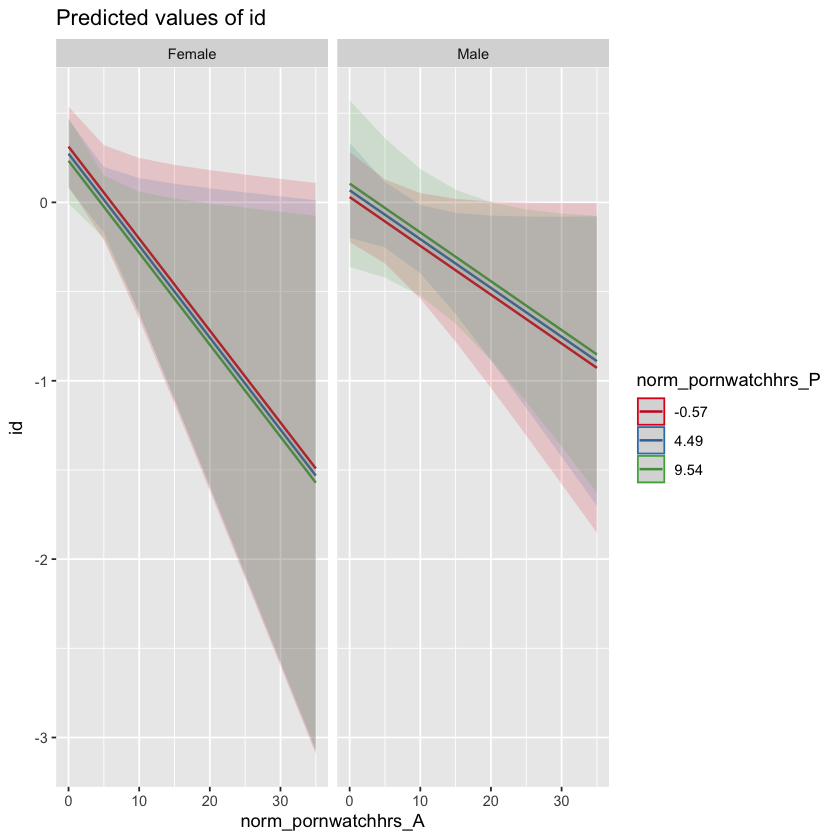

In [257]:
apimind = gls(norm_ssswcommunication_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_ssswcommunication_A ~ sex_A + norm_pornwatchhrs_A:sex_A + norm_pornwatchhrs_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(norm_ssswcommunication_A ~ sex_A + norm_pornwatchhrs_A*sex_A + norm_pornwatchhrs_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("norm_pornwatchhrs_A","norm_pornwatchhrs_P","sex_A"))

##### satisfaction

Generalized least squares fit by maximum likelihood
  Model: norm_ssswsatisfaction_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P 
  Data: dp 
       AIC      BIC    logLik
  859.8974 878.9531 -424.9487

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.5956247 

Coefficients:
                          Value  Std.Error   t-value p-value
(Intercept)          0.29932200 0.10185081  2.938828  0.0035
norm_pornwatchhrs_A -0.03695928 0.01005661 -3.675123  0.0003
norm_pornwatchhrs_P -0.02976551 0.01005661 -2.959795  0.0033

 Correlation: 
                    (Intr) nrm__A
norm_pornwatchhrs_A -0.642       
norm_pornwatchhrs_P -0.642  0.449

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.33787856 -0.76335290 -0.01840942  0.78437620  2.06118004 

Residual standard error: 0.9635794 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_ssswsatisfaction_A ~ sex_A + norm_pornwatchhrs_A:sex_A +      norm_pornwatchhrs_P:sex_A - 1 
  Data: dp 
       AIC     BIC    logLik
  850.6667 884.967 -416.3334

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.6278766 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
   Female      Male 
1.0000000 0.9919412 

Coefficients:
                                     Value  Std.Error   t-value p-value
sex_AFemale                      0.2670781 0.11436905  2.335230  0.0201
sex_AMale                        0.3320783 0.11344738  2.927157  0.0037
sex_AFemale:norm_pornwatchhrs_A -0.0707597 0.02503970 -2.825900  0.0050
sex_AMale:norm_pornwatchhrs_A   -0.0431348 0.01344077 -3.209249  0.0015
sex_AFemale:norm_pornwatchhrs_P -0.0231309 0.01354996 -1.707084  0.0888
sex_AMale:norm_pornwatchhrs_P    0.0029275 0.02483791  0.1

[1] "=============================================================================="


call                                                                                                                                                                                                                                                 
apimind gls(model = norm_ssswsatisfaction_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = norm_ssswsatisfaction_A ~ sex_A + norm_pornwatchhrs_A:sex_A +     norm_pornwatchhrs_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value    
apimind 1     5  859.8974 878.9531 -424.9487              NA          NA
apimd   2     9  850.6667 884.9670 -416.3334 1 vs 2 17.23069 0.001743283

[1] "=============================================================================="


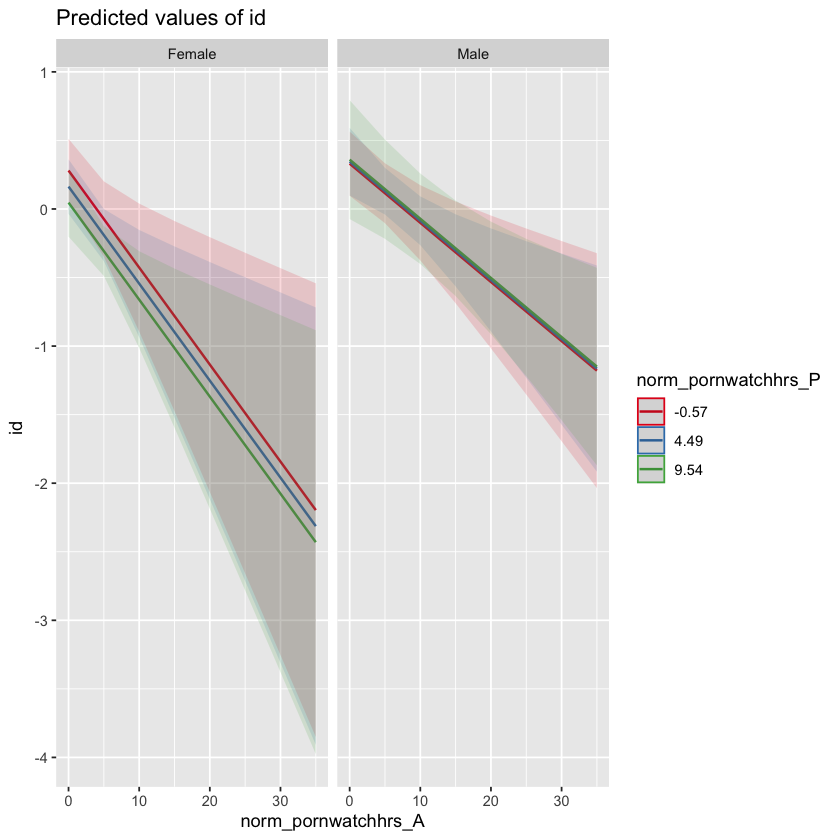

In [258]:
apimind = gls(norm_ssswsatisfaction_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_ssswsatisfaction_A ~ sex_A + norm_pornwatchhrs_A:sex_A + norm_pornwatchhrs_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(norm_ssswsatisfaction_A ~ sex_A + norm_pornwatchhrs_A*sex_A + norm_pornwatchhrs_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("norm_pornwatchhrs_A","norm_pornwatchhrs_P","sex_A"))

##### match

Generalized least squares fit by maximum likelihood
  Model: norm_ssswmatch_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P 
  Data: dp 
       AIC      BIC   logLik
  791.6559 810.7117 -390.828

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
     Rho 
0.678472 

Coefficients:
                          Value  Std.Error   t-value p-value
(Intercept)          0.28004344 0.09862458  2.839489  0.0048
norm_pornwatchhrs_A -0.03621952 0.00940484 -3.851156  0.0001
norm_pornwatchhrs_P -0.03046529 0.00940484 -3.239319  0.0013

 Correlation: 
                    (Intr) nrm__A
norm_pornwatchhrs_A -0.665       
norm_pornwatchhrs_P -0.665  0.553

Standardized residuals:
         Min           Q1          Med           Q3          Max 
-2.469051560 -0.781993233  0.007483002  0.753616707  1.952659595 

Residual standard error: 0.9097384 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_ssswmatch_A ~ sex_A + norm_pornwatchhrs_A:sex_A + norm_pornwatchhrs_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  786.3705 820.6708 -384.1853

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.6946282 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.089274 

Coefficients:
                                      Value  Std.Error   t-value p-value
sex_AFemale                      0.22918919 0.10310566  2.222858  0.0269
sex_AMale                        0.31089661 0.11231036  2.768192  0.0060
sex_AFemale:norm_pornwatchhrs_A -0.03343550 0.02257371 -1.481170  0.1395
sex_AMale:norm_pornwatchhrs_A   -0.05027834 0.01330606 -3.778606  0.0002
sex_AFemale:norm_pornwatchhrs_P -0.03432897 0.01221552 -2.810275  0.0052
sex_AMale:norm_pornwatchhrs_P    0.00998119 0.02458897  0.405

[1] "=============================================================================="


call                                                                                                                                                                                                                                          
apimind gls(model = norm_ssswmatch_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = norm_ssswmatch_A ~ sex_A + norm_pornwatchhrs_A:sex_A +     norm_pornwatchhrs_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value    
apimind 1     5  791.6559 810.7117 -390.8280              NA          NA
apimd   2     9  786.3705 820.6708 -384.1853 1 vs 2 13.28544 0.009962125

[1] "=============================================================================="


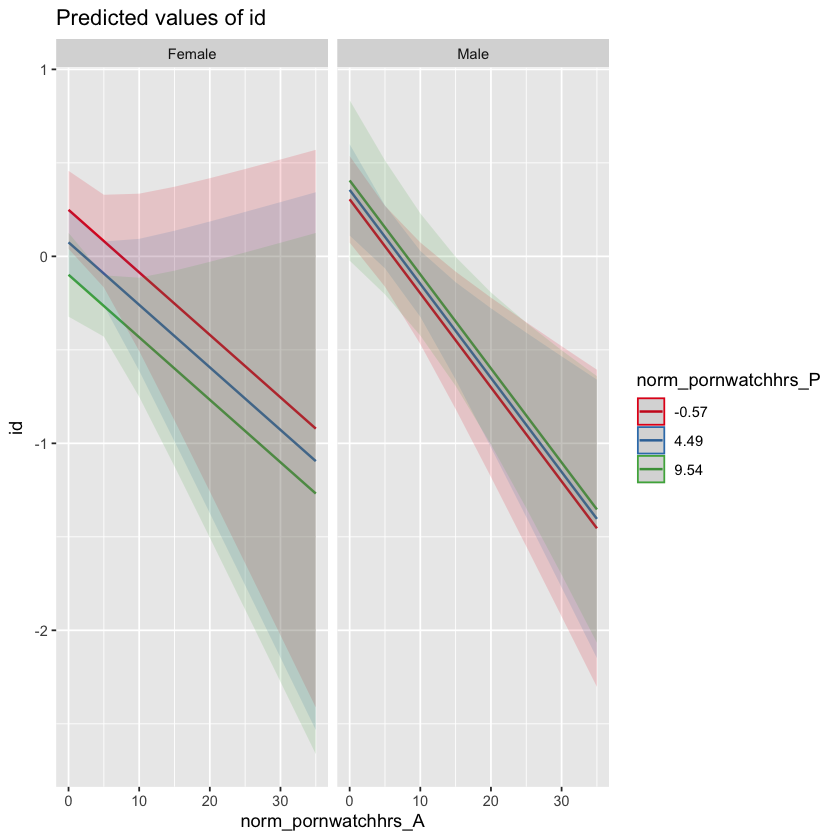

In [259]:
apimind = gls(norm_ssswmatch_A ~ norm_pornwatchhrs_A + norm_pornwatchhrs_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_ssswmatch_A ~ sex_A + norm_pornwatchhrs_A:sex_A + norm_pornwatchhrs_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(norm_ssswmatch_A ~ sex_A + norm_pornwatchhrs_A*sex_A + norm_pornwatchhrs_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("norm_pornwatchhrs_A","norm_pornwatchhrs_P","sex_A"),mdrt.values = "minmax")

##### Wiek

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ c_years_A + c_years_P 
  Data: dp 
       AIC      BIC    logLik
  820.1112 839.1669 -405.0556

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7340639 

Coefficients:
                  Value  Std.Error   t-value p-value
(Intercept)  0.00000000 0.07146734  0.000000  1.0000
c_years_A   -0.01958504 0.01268264 -1.544239  0.1235
c_years_P   -0.02149678 0.01268264 -1.694976  0.0910

 Correlation: 
          (Intr) c_yr_A
c_years_A 0.000        
c_years_P 0.000  0.215 

Standardized residuals:
         Min           Q1          Med           Q3          Max 
-2.283219678 -0.799712948 -0.002276647  0.778289091  1.791423766 

Residual standard error: 0.9873908 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + c_years_A:sex_A + c_years_P:sex_A - 1 
  Data: dp 
       AIC      BIC    logLik
  825.0961 859.3964 -403.5481

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
     Rho 
0.737486 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.071311 

Coefficients:
                            Value  Std.Error    t-value p-value
sex_AFemale           -0.04074170 0.08421224 -0.4837979  0.6289
sex_AMale              0.02688781 0.09021746  0.2980334  0.7659
sex_AFemale:c_years_A -0.02712662 0.02630814 -1.0311111  0.3032
sex_AMale:c_years_A   -0.02103612 0.02759635 -0.7622791  0.4464
sex_AFemale:c_years_P -0.01176777 0.02575943 -0.4568334  0.6481
sex_AMale:c_years_P   -0.02244249 0.02818419 -0.7962793  0.4264

 Correlation: 
                      sx_AFm sx_AMl s_AF:__A s_AM:__A s_AF:__P
sex_

[1] "=============================================================================="


call                                                                                                                                                                                                             
apimind gls(model = norm_sssw_A ~ c_years_A + c_years_P, data = dp, correlation = corCompSymm(form = ~1 |     id), method = "ML", na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + c_years_A:sex_A + c_years_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value  
apimind 1     5  820.1112 839.1669 -405.0556              NA        NA
apimd   2     9  825.0961 859.3964 -403.5481 1 vs 2 3.015015 0.5553158

[1] "=============================================================================="


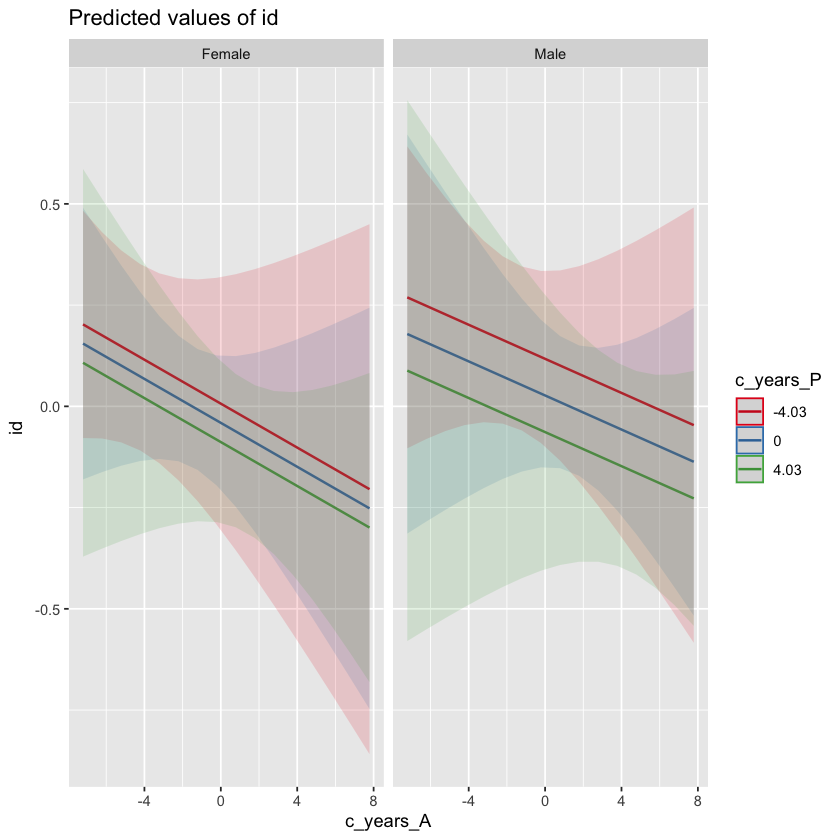

In [260]:
apimind = gls(norm_sssw_A ~ c_years_A + c_years_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  c_years_A:sex_A +  c_years_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(norm_sssw_A ~ sex_A + c_years_A*sex_A + c_years_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("c_years_A","c_years_P","sex_A"),mdrt.values = "minmax")

##### Buractwo

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ c_views_A + c_views_P 
  Data: dp 
      AIC      BIC   logLik
  810.646 829.7017 -400.323

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7249536 

Coefficients:
                 Value  Std.Error   t-value p-value
(Intercept)  0.0000000 0.06977902  0.000000  1.0000
c_views_A   -0.2359766 0.06785392 -3.477715  0.0006
c_views_P   -0.1269200 0.06785392 -1.870489  0.0623

 Correlation: 
          (Intr) c_vw_A
c_views_A 0.000        
c_views_P 0.000  0.132 

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.3267689 -0.8071599 -0.0321122  0.8048400  2.2413710 

Residual standard error: 0.9666074 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + c_views_A:sex_A + c_views_P:sex_A - 1 
  Data: dp 
       AIC      BIC    logLik
  810.7071 845.0073 -396.3535

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7224458 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.056273 

Coefficients:
                           Value  Std.Error   t-value p-value
sex_AFemale            0.0040149 0.07565593  0.053068  0.9577
sex_AMale              0.0861905 0.07991334  1.078550  0.2816
sex_AFemale:c_views_A  0.0111963 0.13545202  0.082659  0.9342
sex_AMale:c_views_A   -0.5064908 0.13709372 -3.694486  0.0003
sex_AFemale:c_views_P -0.3457927 0.12979001 -2.664247  0.0081
sex_AMale:c_views_P    0.1408075 0.14307435  0.984156  0.3258

 Correlation: 
                      sx_AFm sx_AMl s_AF:__A s_AM:__A s_AF:__P
sex_AMale       

[1] "=============================================================================="


call                                                                                                                                                                                                             
apimind gls(model = norm_sssw_A ~ c_views_A + c_views_P, data = dp, correlation = corCompSymm(form = ~1 |     id), method = "ML", na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + c_views_A:sex_A + c_views_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value   
apimind 1     5  810.6460 829.7017 -400.3230              NA         NA
apimd   2     9  810.7071 845.0073 -396.3535 1 vs 2 7.938976 0.09383933

[1] "=============================================================================="


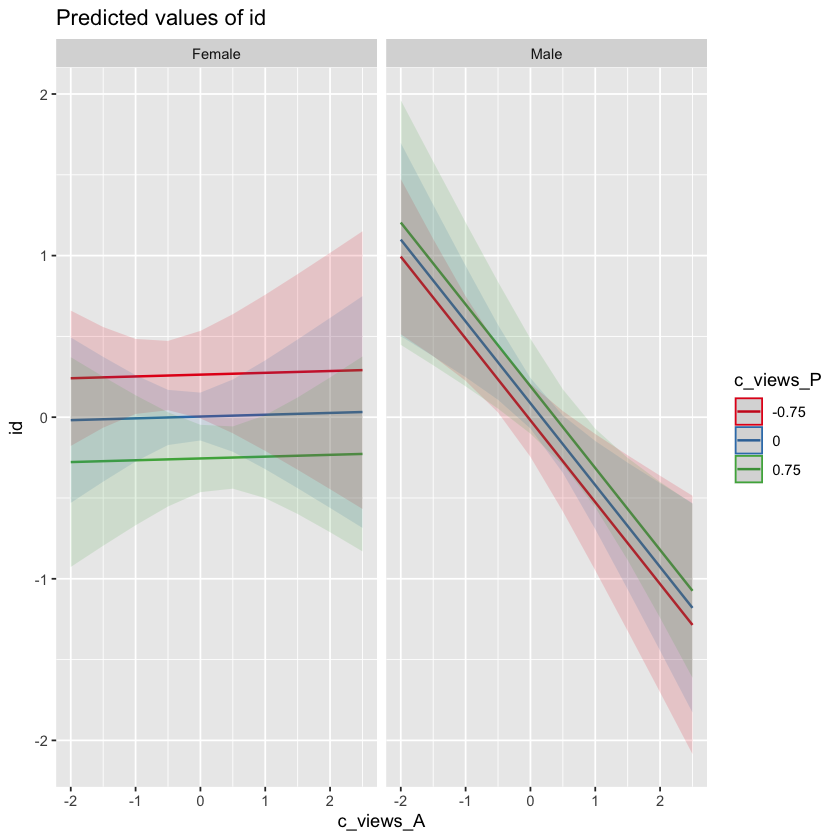

In [321]:
apimind = gls(norm_sssw_A ~ c_views_A + c_views_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  c_views_A:sex_A +  c_views_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(norm_sssw_A ~ sex_A + c_views_A*sex_A + c_views_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("c_views_A","c_views_P","sex_A"),mdrt.values = "minmax")

In [320]:
summary(apimd2)

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + c_views_A * sex_A + c_views_P * sex_A 
  Data: dp 
       AIC      BIC    logLik
  810.7071 845.0073 -396.3535

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7224458 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.056273 

Coefficients:
                         Value  Std.Error    t-value p-value
(Intercept)          0.0040149 0.07565593  0.0530682  0.9577
sex_AMale            0.0821756 0.05808843  1.4146640  0.1581
c_views_A            0.0111963 0.13545202  0.0826590  0.9342
c_views_P           -0.3457927 0.12979001 -2.6642473  0.0081
sex_AMale:c_views_A -0.5176872 0.23536668 -2.1994922  0.0285
sex_AMale:c_views_P  0.4866002 0.23573556  2.0641782  0.0398

 Correlation: 
                    (Intr) sx_AMl c_vw_A c_vw_P s_AM:__A
sex_AMale           -0.309   

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ pornusemoral_A + pornusemoral_P 
  Data: dp 
       AIC      BIC    logLik
  822.0516 841.1073 -406.0258

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7426134 

Coefficients:
                     Value  Std.Error    t-value p-value
(Intercept)     0.07824243 0.19353437  0.4042818  0.6863
pornusemoral_A  0.02821156 0.04580066  0.6159641  0.5383
pornusemoral_P -0.05877644 0.04580066 -1.2833099  0.2003

 Correlation: 
               (Intr) prns_A
pornusemoral_A -0.710       
pornusemoral_P -0.710  0.172

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.29584814 -0.76385572  0.05261321  0.78754246  1.69083755 

Residual standard error: 0.9971592 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + pornusemoral_A:sex_A + pornusemoral_P:sex_A -      1 
  Data: dp 
       AIC     BIC    logLik
  824.8877 859.188 -403.4439

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7488469 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.071695 

Coefficients:
                                 Value  Std.Error    t-value p-value
sex_AFemale                 0.04742905 0.20087350  0.2361140  0.8135
sex_AMale                   0.11053775 0.21527506  0.5134721  0.6080
sex_AFemale:pornusemoral_A  0.04176140 0.09072949  0.4602848  0.6456
sex_AMale:pornusemoral_A    0.06621672 0.10725775  0.6173607  0.5374
sex_AFemale:pornusemoral_P -0.08057588 0.10008238 -0.8050956  0.4213
sex_AMale:pornusemoral_P   -0.08677340 0.09723431 -0.8924155  0.3728

 Correlation: 
                 

[1] "=============================================================================="


call                                                                                                                                                                                                                       
apimind gls(model = norm_sssw_A ~ pornusemoral_A + pornusemoral_P, data = dp,     correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                               
apimd   gls(model = norm_sssw_A ~ sex_A + pornusemoral_A:sex_A + pornusemoral_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value  
apimind 1     5  822.0516 841.1073 -406.0258              NA        NA
apimd   2     9  824.8877 859.1880 -403.4439 1 vs 2 5.163901 0.2708899

[1] "=============================================================================="


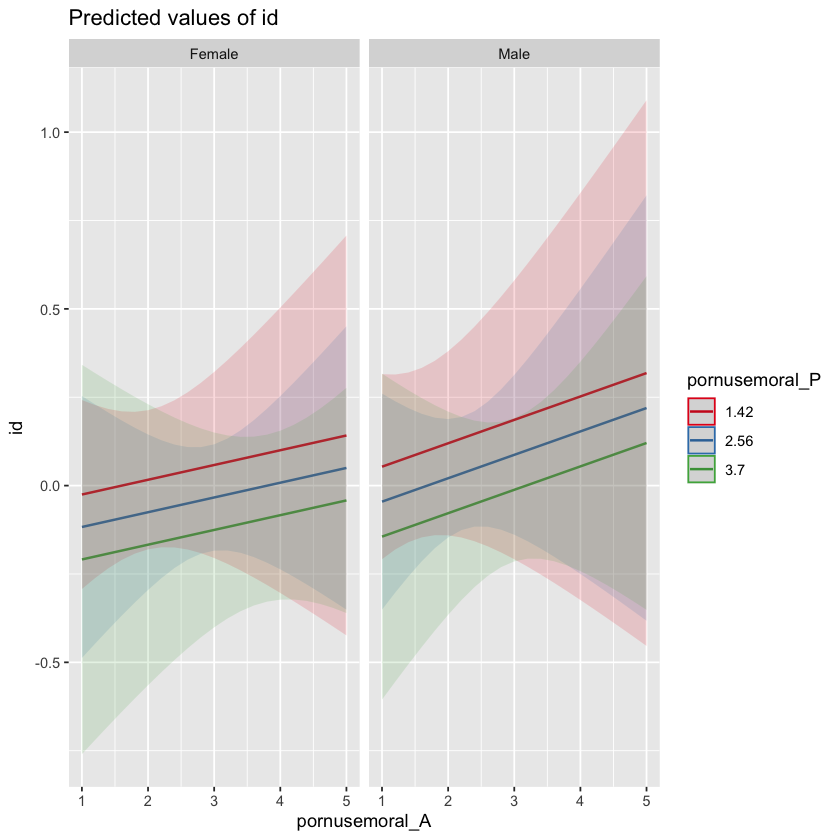

In [262]:
apimind = gls(norm_sssw_A ~ pornusemoral_A + pornusemoral_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A + pornusemoral_A:sex_A + pornusemoral_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + pornusemoral_A*sex_A + pornusemoral_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("pornusemoral_A","pornusemoral_P","sex_A"))

##### Podskale PCI

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ c_pcicuriousity_A + c_pcicuriousity_P 
  Data: dp 
       AIC      BIC    logLik
  725.3477 743.8332 -357.6739

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7553557 

Coefficients:
                        Value  Std.Error    t-value p-value
(Intercept)       -0.03289051 0.07657855 -0.4295003  0.6679
c_pcicuriousity_A -0.09616319 0.04470689 -2.1509701  0.0323
c_pcicuriousity_P  0.03356119 0.04470689  0.7506938  0.4534

 Correlation: 
                  (Intr) c_pc_A
c_pcicuriousity_A -0.011       
c_pcicuriousity_P -0.011  0.495

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.12557700 -0.75448802  0.02789528  0.77868573  1.78855749 

Residual standard error: 0.9926561 
Degrees of freedom: 298 total; 295 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + c_pcicuriousity_A:sex_A + c_pcicuriousity_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  719.9343 753.2081 -350.9672

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7733702 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.079739 

Coefficients:
                                    Value  Std.Error    t-value p-value
sex_AFemale                   -0.13330248 0.08857842 -1.5049092  0.1334
sex_AMale                      0.06958077 0.09564161  0.7275157  0.4675
sex_AFemale:c_pcicuriousity_A -0.11742647 0.07633550 -1.5382943  0.1251
sex_AMale:c_pcicuriousity_A   -0.15302937 0.09129862 -1.6761411  0.0948
sex_AFemale:c_pcicuriousity_P  0.08666254 0.08455617  1.0249109  0.3063
sex_AMale:c_pcicuriousity_P    0.05811257 0.08242244  0.7050576  0.4813

 Co

[1] "=============================================================================="


call                                                                                                                                                                                                                             
apimind gls(model = norm_sssw_A ~ c_pcicuriousity_A + c_pcicuriousity_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                               
apimd   gls(model = norm_sssw_A ~ sex_A + c_pcicuriousity_A:sex_A + c_pcicuriousity_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value    
apimind 1     5  725.3477 743.8332 -357.6739              NA          NA
apimd   2     9  719.9343 753.2081 -350.9672 1 vs 2 13.41343 0.009422783

[1] "=============================================================================="


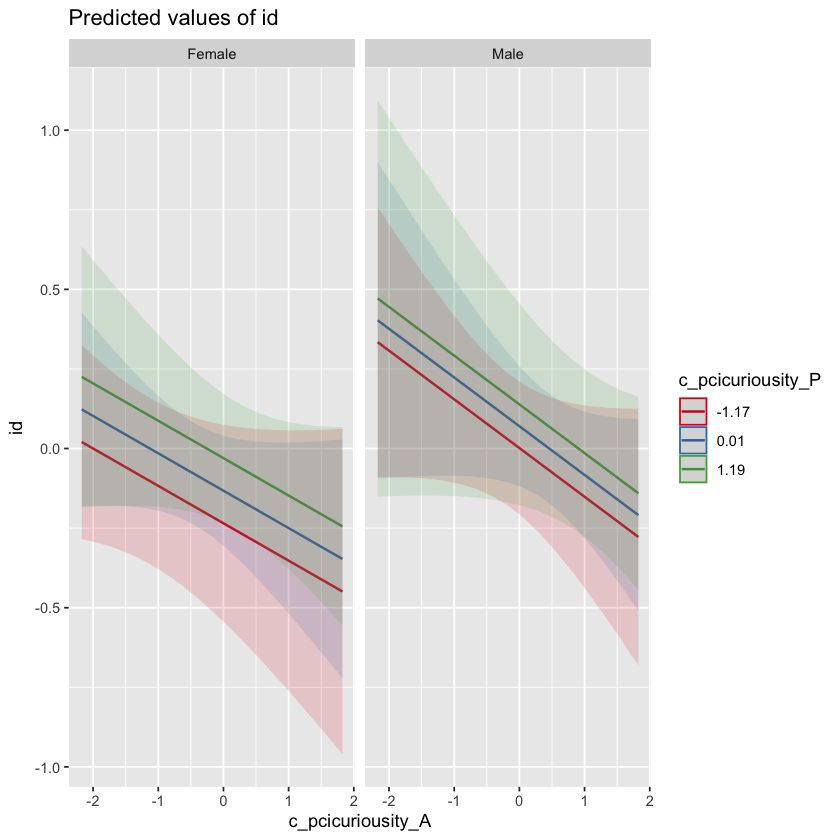

In [263]:
apimind = gls(norm_sssw_A ~ c_pcicuriousity_A + c_pcicuriousity_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  c_pcicuriousity_A:sex_A +  c_pcicuriousity_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(norm_sssw_A ~ sex_A + c_pcicuriousity_A*sex_A + c_pcicuriousity_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")

plot_model(apimd2, type = 'pred', terms=c("c_pcicuriousity_A","c_pcicuriousity_P","sex_A"),mdrt.values = "minmax")

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ c_pciavoidance_A + c_pciavoidance_P 
  Data: dp 
       AIC      BIC    logLik
  703.9971 722.4825 -346.9985

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7098963 

Coefficients:
                       Value  Std.Error   t-value p-value
(Intercept)      -0.02637961 0.07034654 -0.374995  0.7079
c_pciavoidance_A -0.24105415 0.04327792 -5.569911  0.0000
c_pciavoidance_P -0.14444095 0.04327792 -3.337521  0.0010

 Correlation: 
                 (Intr) c_pc_A
c_pciavoidance_A -0.016       
c_pciavoidance_P -0.016  0.411

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.11228893 -0.78055047 -0.03475968  0.80719210  2.67514793 

Residual standard error: 0.9238155 
Degrees of freedom: 298 total; 295 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + c_pciavoidance_A:sex_A + c_pciavoidance_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  703.1708 736.4446 -342.5854

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7213409 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.072583 

Coefficients:
                                  Value  Std.Error   t-value p-value
sex_AFemale                  -0.0794511 0.08121451 -0.978287  0.3287
sex_AMale                     0.0824375 0.08710928  0.946369  0.3447
sex_AFemale:c_pciavoidance_A -0.2115588 0.07968975 -2.654780  0.0084
sex_AMale:c_pciavoidance_A   -0.3200451 0.07813584 -4.096009  0.0001
sex_AFemale:c_pciavoidance_P -0.1649982 0.07284831 -2.264956  0.0242
sex_AMale:c_pciavoidance_P   -0.0617638 0.08547385 -0.722604  0.4705

 Correlation: 
           

[1] "=============================================================================="


call                                                                                                                                                                                                                           
apimind gls(model = norm_sssw_A ~ c_pciavoidance_A + c_pciavoidance_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                               
apimd   gls(model = norm_sssw_A ~ sex_A + c_pciavoidance_A:sex_A + c_pciavoidance_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio p-value  
apimind 1     5  703.9971 722.4825 -346.9985             NA        NA
apimd   2     9  703.1708 736.4446 -342.5854 1 vs 2 8.82631 0.0655906

[1] "=============================================================================="


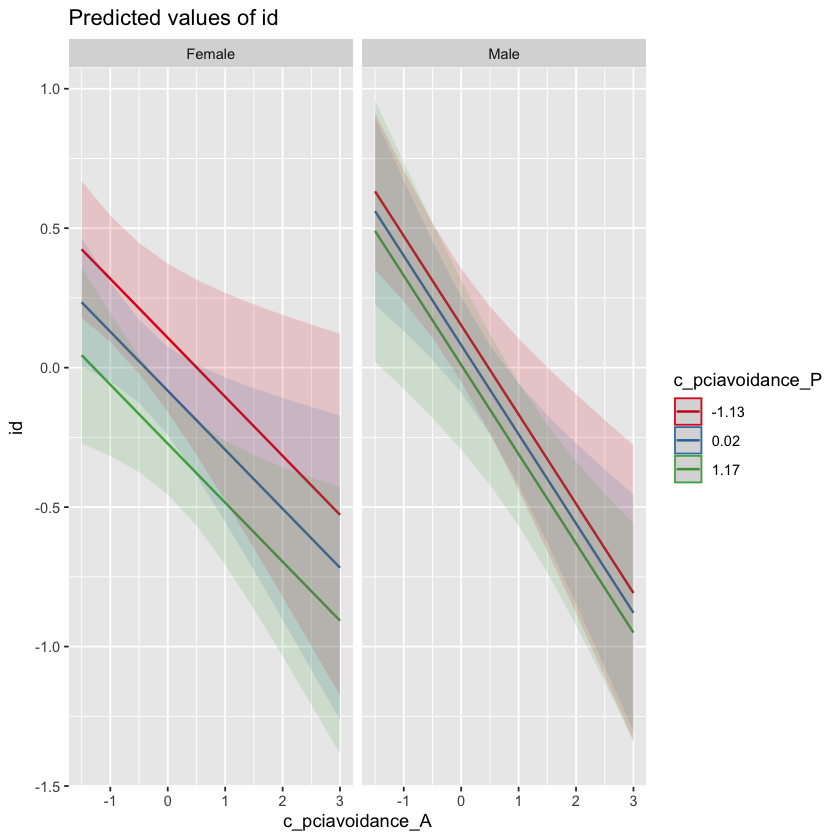

In [265]:
apimind = gls(norm_sssw_A ~ c_pciavoidance_A + c_pciavoidance_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  c_pciavoidance_A:sex_A +  c_pciavoidance_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(norm_sssw_A ~ sex_A + c_pciavoidance_A*sex_A + c_pciavoidance_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("c_pciavoidance_A","c_pciavoidance_P","sex_A"),mdrt.values = "minmax")

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ c_pcipleasure_A + c_pcipleasure_P 
  Data: dp 
       AIC     BIC    logLik
  721.8166 740.302 -355.9083

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7334893 

Coefficients:
                      Value Std.Error   t-value p-value
(Intercept)     -0.02518727 0.0743237 -0.338886  0.7349
c_pcipleasure_A -0.13624229 0.0385209 -3.536841  0.0005
c_pcipleasure_P -0.06932465 0.0385209 -1.799663  0.0729

 Correlation: 
                (Intr) c_pc_A
c_pcipleasure_A -0.031       
c_pcipleasure_P -0.031  0.429

Standardized residuals:
         Min           Q1          Med           Q3          Max 
-2.382317923 -0.780521203  0.003002298  0.859512716  1.942173830 

Residual standard error: 0.9689287 
Degrees of freedom: 298 total; 295 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + c_pcipleasure_A:sex_A + c_pcipleasure_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  718.8769 752.1507 -350.4384

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7397488 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.092479 

Coefficients:
                                  Value  Std.Error    t-value p-value
sex_AFemale                 -0.04088450 0.07975955 -0.5125969  0.6086
sex_AMale                    0.07578877 0.08713561  0.8697795  0.3851
sex_AFemale:c_pcipleasure_A -0.07093856 0.06198206 -1.1445014  0.2534
sex_AMale:c_pcipleasure_A   -0.23655290 0.07586902 -3.1179119  0.0020
sex_AFemale:c_pcipleasure_P -0.17747685 0.06944668 -2.5555843  0.0111
sex_AMale:c_pcipleasure_P    0.04425596 0.06771408  0.6535710  0.5139

 Correlation: 
      

[1] "=============================================================================="


call                                                                                                                                                                                                                         
apimind gls(model = norm_sssw_A ~ c_pcipleasure_A + c_pcipleasure_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                               
apimd   gls(model = norm_sssw_A ~ sex_A + c_pcipleasure_A:sex_A + c_pcipleasure_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value   
apimind 1     5  721.8166 740.3020 -355.9083              NA         NA
apimd   2     9  718.8769 752.1507 -350.4384 1 vs 2 10.93968 0.02725031

[1] "=============================================================================="


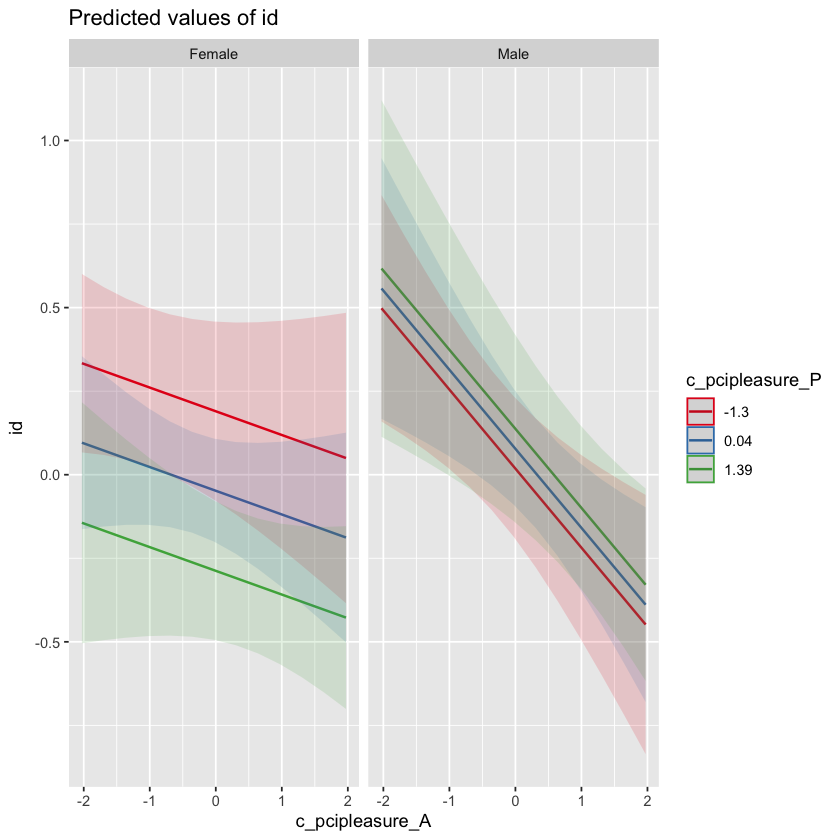

In [267]:
apimind = gls(norm_sssw_A ~ c_pcipleasure_A + c_pcipleasure_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  c_pcipleasure_A:sex_A +  c_pcipleasure_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(norm_sssw_A ~ sex_A + c_pcipleasure_A*sex_A + c_pcipleasure_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("c_pcipleasure_A","c_pcipleasure_P","sex_A"),mdrt.values = "minmax")

##### (...) Ludzie podobni do mnie, jeżeli chodzi o wiek, płeć i styl życia * Płeć

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ comp1_A + comp1_P 
  Data: dp 
       AIC      BIC    logLik
  731.7924 750.2779 -360.8962

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7461238 

Coefficients:
                 Value Std.Error    t-value p-value
(Intercept) -0.3366429 0.4029590 -0.8354274  0.4042
comp1_A      0.0740192 0.0585396  1.2644297  0.2071
comp1_P      0.0071659 0.0585396  0.1224109  0.9027

 Correlation: 
        (Intr) cmp1_A
comp1_A -0.889       
comp1_P -0.889  0.640

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.19626391 -0.79364756  0.05632943  0.77022102  1.71222745 

Residual standard error: 0.9955102 
Degrees of freedom: 298 total; 295 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + comp1_A:sex_A + comp1_P:sex_A - 1 
  Data: dp 
       AIC      BIC    logLik
  734.5029 767.7767 -358.2515

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7526935 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.075455 

Coefficients:
                         Value Std.Error    t-value p-value
sex_AFemale         -0.2563585 0.4166365 -0.6153049  0.5388
sex_AMale           -0.4144477 0.4480739 -0.9249539  0.3558
sex_AFemale:comp1_A  0.0351739 0.0865089  0.4065932  0.6846
sex_AMale:comp1_A    0.1254860 0.0948253  1.3233399  0.1868
sex_AFemale:comp1_P  0.0131431 0.0881722  0.1490615  0.8816
sex_AMale:comp1_P   -0.0096562 0.0930365 -0.1037888  0.9174

 Correlation: 
                    sx_AFm sx_AMl s_AF:1_A s_AM:1_A s_AF:1_P
sex_AMale            0.753          

[1] "=============================================================================="


call                                                                                                                                                                                                         
apimind gls(model = norm_sssw_A ~ comp1_A + comp1_P, data = dp, correlation = corCompSymm(form = ~1 |     id), method = "ML", na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + comp1_A:sex_A + comp1_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value  
apimind 1     5  731.7924 750.2779 -360.8962              NA        NA
apimd   2     9  734.5029 767.7767 -358.2515 1 vs 2 5.289491 0.2588623

[1] "=============================================================================="


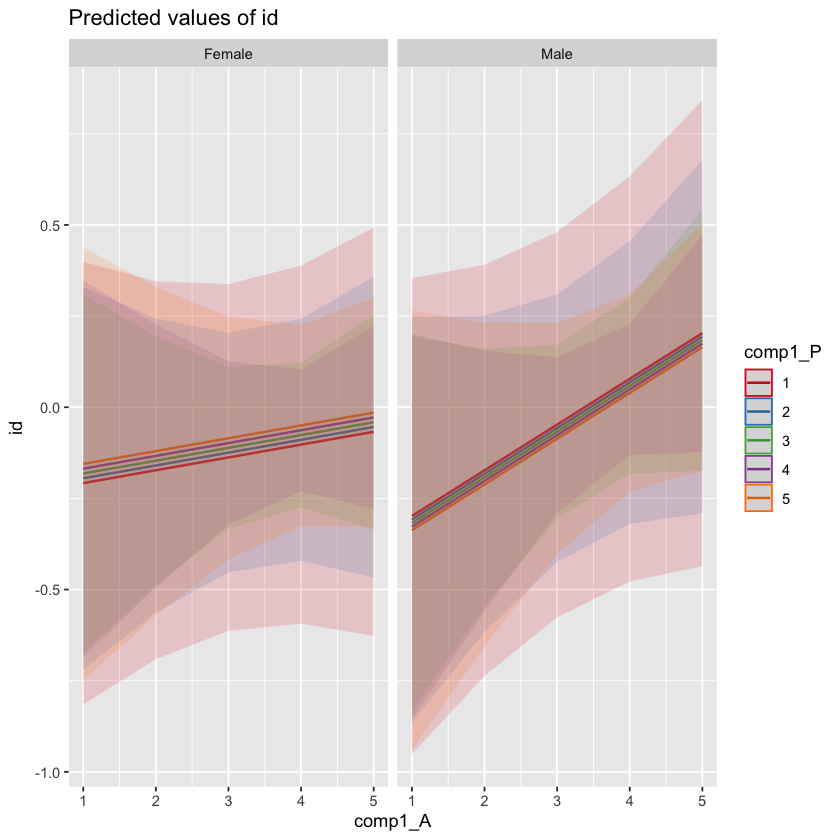

In [268]:
apimind = gls(norm_sssw_A ~ comp1_A + comp1_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  comp1_A:sex_A +  comp1_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + comp1_A*sex_A + comp1_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("comp1_A","comp1_P","sex_A"),mdrt.values = "minmax")

##### Moja partnerka/Mój parter

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ comp2_A + comp2_P 
  Data: dp 
       AIC      BIC    logLik
  819.8691 838.9248 -404.9346

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7460381 

Coefficients:
                   Value Std.Error    t-value p-value
(Intercept) -0.007548198 0.3225172 -0.0234040  0.9813
comp2_A      0.026051779 0.0593815  0.4387190  0.6612
comp2_P     -0.023253668 0.0593815 -0.3915981  0.6956

 Correlation: 
        (Intr) cmp2_A
comp2_A -0.956       
comp2_P -0.956  0.925

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.18489221 -0.75929795  0.06314889  0.77055065  1.71478819 

Residual standard error: 0.9967511 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + comp2_A:sex_A + comp2_P:sex_A - 1 
  Data: dp 
       AIC      BIC    logLik
  812.6352 846.9355 -397.3176

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7475122 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.039061 

Coefficients:
                          Value Std.Error    t-value p-value
sex_AFemale         -0.17827492 0.3332819 -0.5349072  0.5931
sex_AMale            0.08431195 0.3463002  0.2434649  0.8078
sex_AFemale:comp2_A -0.01143288 0.0655305 -0.1744665  0.8616
sex_AMale:comp2_A    0.16830673 0.0821536  2.0486836  0.0413
sex_AFemale:comp2_P  0.09357778 0.0790653  1.1835513  0.2374
sex_AMale:comp2_P   -0.11722539 0.0680902 -1.7216191  0.0861

 Correlation: 
                    sx_AFm sx_AMl s_AF:2_A s_AM:2_A s_AF:2_P
sex_AMale            0.748   

[1] "=============================================================================="


call                                                                                                                                                                                                         
apimind gls(model = norm_sssw_A ~ comp2_A + comp2_P, data = dp, correlation = corCompSymm(form = ~1 |     id), method = "ML", na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + comp2_A:sex_A + comp2_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value    
apimind 1     5  819.8691 838.9248 -404.9346              NA          NA
apimd   2     9  812.6352 846.9355 -397.3176 1 vs 2 15.23394 0.004239815

[1] "=============================================================================="


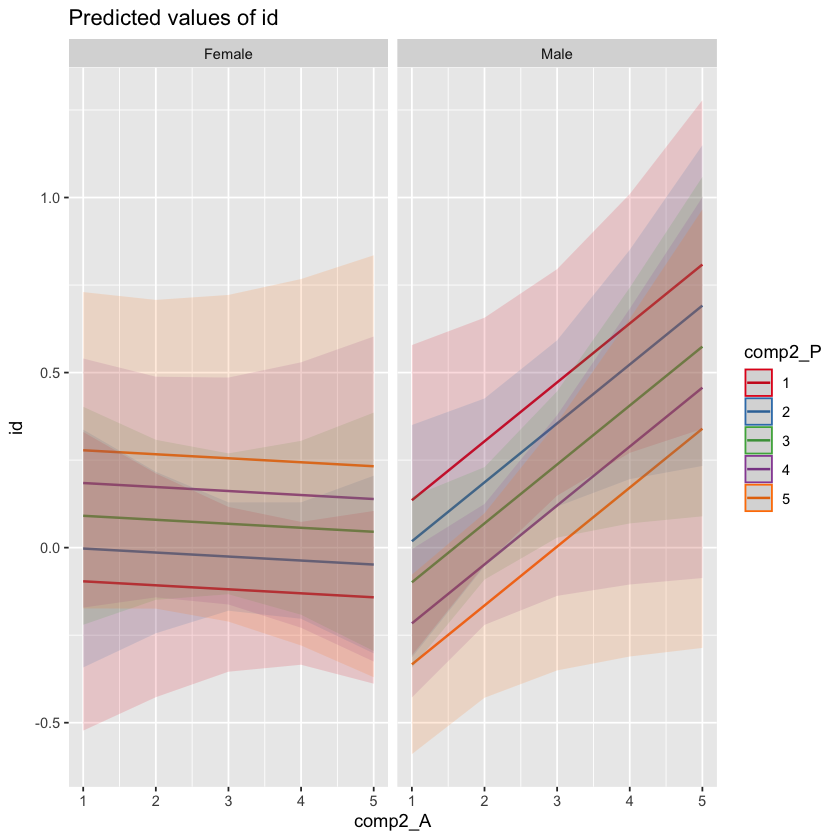

In [269]:
apimind = gls(norm_sssw_A ~ comp2_A + comp2_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  comp2_A:sex_A +  comp2_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + comp2_A*sex_A + comp2_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("comp2_A","comp2_P","sex_A"),mdrt.values = "minmax")

##### Gdybym {mógł/mogła} mieć na to wpływ, chciał{/a}bym, żeby {moja partnerka/mój partner} korzystał{a/} z pornografii

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ comp3_A + comp3_P 
  Data: dp 
       AIC      BIC    logLik
  818.2137 837.2695 -404.1069

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7473294 

Coefficients:
                  Value  Std.Error    t-value p-value
(Intercept)  0.14288014 0.25609737  0.5579133  0.5773
comp3_A     -0.08978056 0.05421782 -1.6559236  0.0987
comp3_P      0.03409565 0.05421782  0.6288643  0.5299

 Correlation: 
        (Intr) cmp3_A
comp3_A -0.847       
comp3_P -0.847  0.559

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.18290424 -0.77730309  0.02667609  0.80384819  1.73343652 

Residual standard error: 0.9953681 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + comp3_A:sex_A + comp3_P:sex_A - 1 
  Data: dp 
       AIC      BIC    logLik
  817.4985 851.7988 -399.7493

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7492255 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.051286 

Coefficients:
                          Value  Std.Error    t-value p-value
sex_AFemale         -0.11167856 0.26720217 -0.4179553  0.6763
sex_AMale            0.28603919 0.28090583  1.0182743  0.3093
sex_AFemale:comp3_A  0.08479005 0.08953296  0.9470262  0.3443
sex_AMale:comp3_A   -0.23529921 0.08640341 -2.7232630  0.0068
sex_AFemale:comp3_P -0.05530326 0.08218832 -0.6728847  0.5015
sex_AMale:comp3_P    0.12672641 0.09412472  1.3463669  0.1791

 Correlation: 
                    sx_AFm sx_AMl s_AF:3_A s_AM:3_A s_AF:3_P
sex_AMale            0

[1] "=============================================================================="


call                                                                                                                                                                                                         
apimind gls(model = norm_sssw_A ~ comp3_A + comp3_P, data = dp, correlation = corCompSymm(form = ~1 |     id), method = "ML", na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + comp3_A:sex_A + comp3_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value   
apimind 1     5  818.2137 837.2695 -404.1069              NA         NA
apimd   2     9  817.4985 851.7988 -399.7493 1 vs 2 8.715224 0.06862534

[1] "=============================================================================="


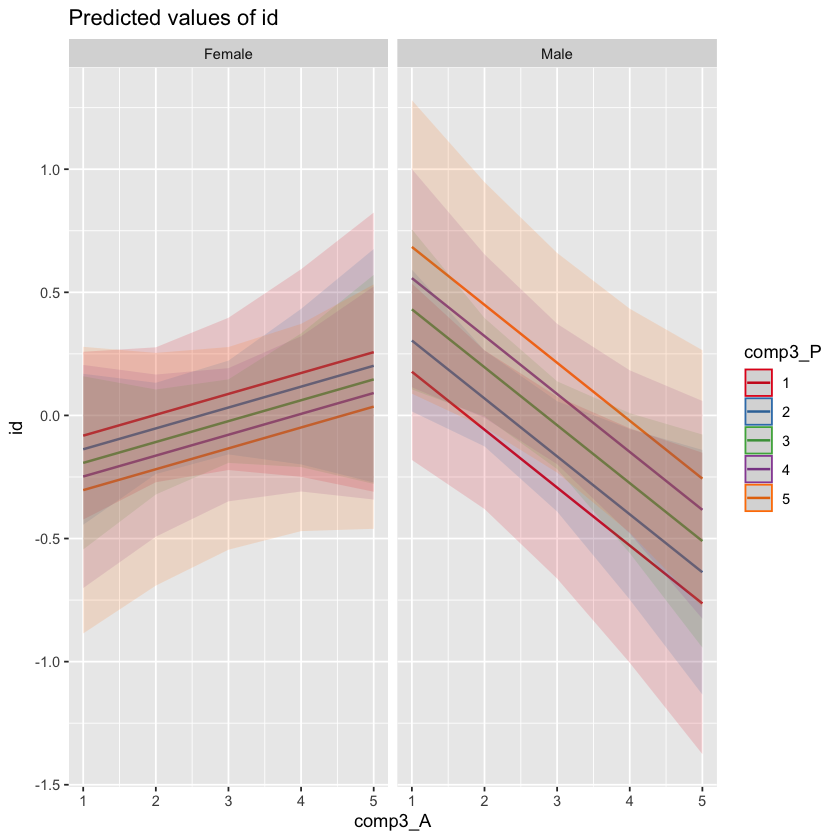

In [270]:
apimind = gls(norm_sssw_A ~ comp3_A + comp3_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  comp3_A:sex_A +  comp3_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + comp3_A*sex_A + comp3_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("comp3_A","comp3_P","sex_A"),mdrt.values = "minmax")

##### Uzależnienie od porno

In [95]:
dp$pornuseaddiction_A[is.na(dp$pornuseaddiction_A)] = 0
dp$pornuseaddiction_P[is.na(dp$pornuseaddiction_P)] = 0

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ pornuseaddiction_A + pornuseaddiction_P 
  Data: dp 
       AIC      BIC    logLik
  791.5022 810.5579 -390.7511

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7027071 

Coefficients:
                        Value  Std.Error   t-value p-value
(Intercept)         0.6960182 0.13992717  4.974146   0e+00
pornuseaddiction_A -0.2995895 0.05203205 -5.757787   0e+00
pornuseaddiction_P -0.1939775 0.05203205 -3.728040   2e-04

 Correlation: 
                   (Intr) prns_A
pornuseaddiction_A -0.74        
pornuseaddiction_P -0.74   0.41 

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.3458207 -0.6562642  0.0508042  0.7523976  2.4591316 

Residual standard error: 0.9242057 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + pornuseaddiction_A:sex_A + pornuseaddiction_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  795.1103 829.4105 -388.5551

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7076807 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.062736 

Coefficients:
                                    Value  Std.Error   t-value p-value
sex_AFemale                     0.6364091 0.14732322  4.319815  0.0000
sex_AMale                       0.7555427 0.15656573  4.825722  0.0000
sex_AFemale:pornuseaddiction_A -0.2609235 0.09525739 -2.739142  0.0065
sex_AMale:pornuseaddiction_A   -0.3557321 0.08706522 -4.085812  0.0001
sex_AFemale:pornuseaddiction_P -0.2149935 0.08192552 -2.624255  0.0091
sex_AMale:pornuseaddiction_P   -0.1377035 0.10123348 -1.360256  0.1747

 Correla

[1] "=============================================================================="


call                                                                                                                                                                                                                                   
apimind gls(model = norm_sssw_A ~ pornuseaddiction_A + pornuseaddiction_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + pornuseaddiction_A:sex_A +     pornuseaddiction_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value  
apimind 1     5  791.5022 810.5579 -390.7511              NA        NA
apimd   2     9  795.1103 829.4105 -388.5551 1 vs 2 4.391886 0.3555602

[1] "=============================================================================="


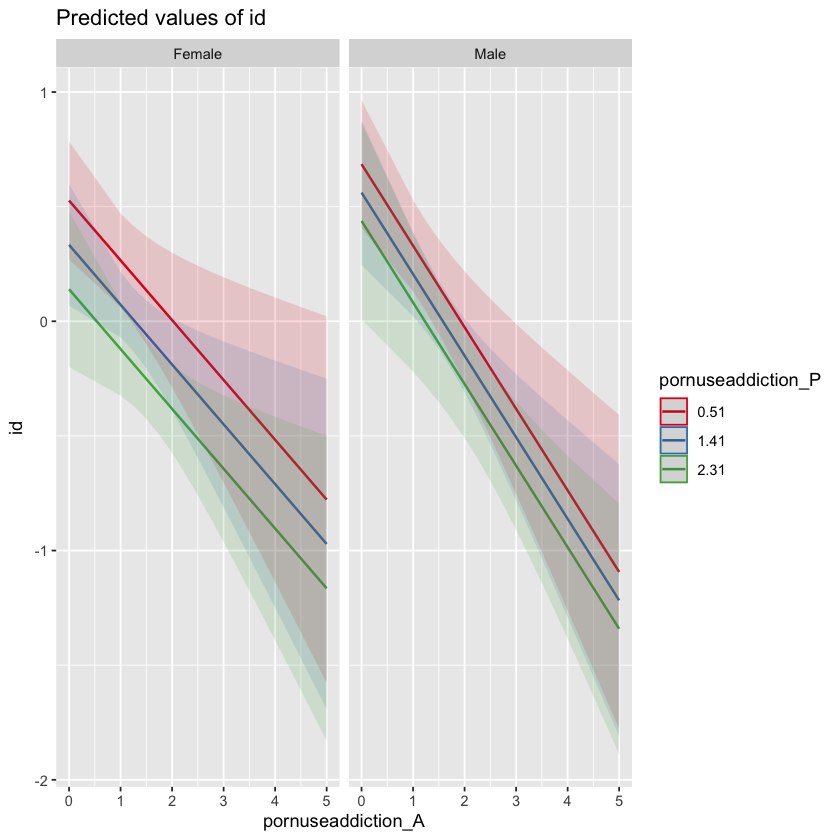

In [271]:


apimind = gls(norm_sssw_A ~ pornuseaddiction_A + pornuseaddiction_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  pornuseaddiction_A:sex_A +  pornuseaddiction_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + pornuseaddiction_A*sex_A + pornuseaddiction_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("pornuseaddiction_A","pornuseaddiction_P","sex_A"),mdrt.values = "minmax")

##### Z kim najczęściej 

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ use5_A + use5_P 
  Data: dp 
       AIC      BIC    logLik
  507.4349 530.9967 -246.7174

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.6960648 

Coefficients:
                                 Value Std.Error   t-value p-value
(Intercept)                 -0.2172583 0.1937073 -1.121580  0.2633
use5_AAlone, in secret      -0.1384779 0.1517633 -0.912460  0.3626
use5_ATogether with partner  0.5634027 0.1517191  3.713460  0.0003
use5_PAlone, in secret      -0.2441300 0.1517633 -1.608624  0.1092
use5_PTogether with partner  0.2393279 0.1517191  1.577441  0.1162

 Correlation: 
                            (Intr) u5_Ais u5_Awp u5_Pis
use5_AAlone, in secret      -0.745                     
use5_ATogether with partner -0.677  0.593              
use5_PAlone, in secret      -0.745  0.600  0.367       
use5_PTogether with partner -0.677  0.367  0.391  0.593

Standardized re

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + use5_A:sex_A + use5_P:sex_A - 1 
  Data: dp 
      AIC      BIC   logLik
  509.798 553.5557 -241.899

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7153871 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.118497 

Coefficients:
                                             Value Std.Error    t-value p-value
sex_AFemale                             -0.2926037 0.2063403 -1.4180640  0.1577
sex_AMale                               -0.1693223 0.2307909 -0.7336612  0.4640
sex_AFemale:use5_AAlone, in secret      -0.0420751 0.2353124 -0.1788053  0.8583
sex_AMale:use5_AAlone, in secret        -0.1709013 0.2316099 -0.7378842  0.4614
sex_AFemale:use5_ATogether with partner  0.5919310 0.2593136  2.2826837  0.0235
sex_AMale:use5_ATogether with partner    0.6549668 0.268525

[1] "=============================================================================="


call                                                                                                                                                                                                       
apimind gls(model = norm_sssw_A ~ use5_A + use5_P, data = dp, correlation = corCompSymm(form = ~1 |     id), method = "ML", na.action = na.omit)                                                                   
apimd   gls(model = norm_sssw_A ~ sex_A + use5_A:sex_A + use5_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value  
apimind 1      7 507.4349 530.9967 -246.7174              NA        NA
apimd   2     13 509.7980 553.5557 -241.8990 1 vs 2 9.636859 0.1408014

[1] "=============================================================================="


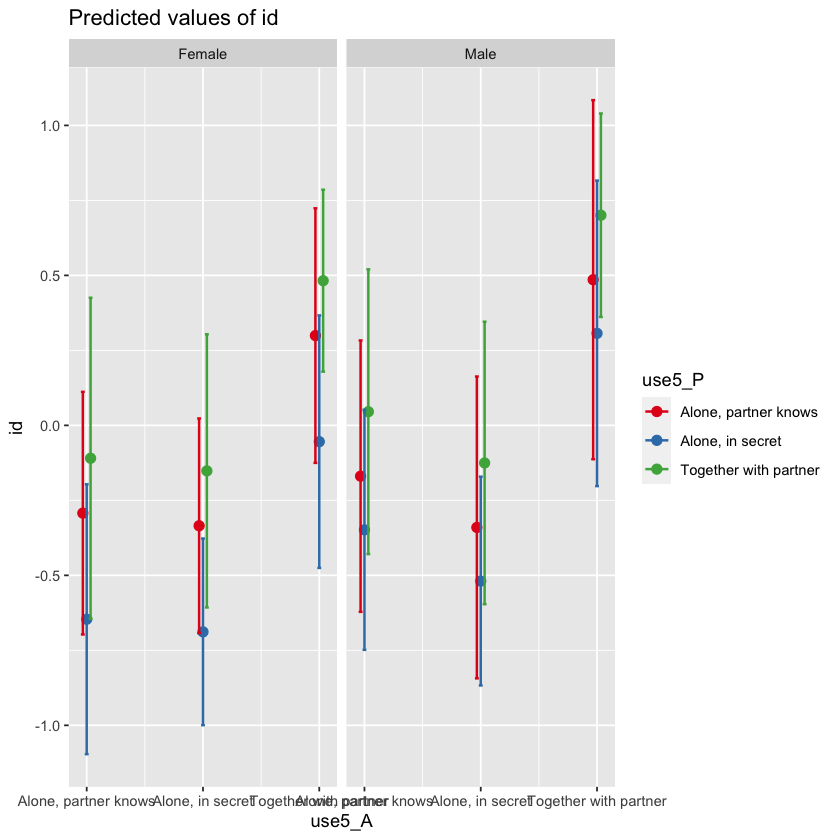

In [272]:
apimind = gls(norm_sssw_A ~ use5_A + use5_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  use5_A:sex_A +  use5_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + use5_A*sex_A + use5_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("use5_A","use5_P","sex_A"),mdrt.values = "minmax")

### DV => pornwatchhrs

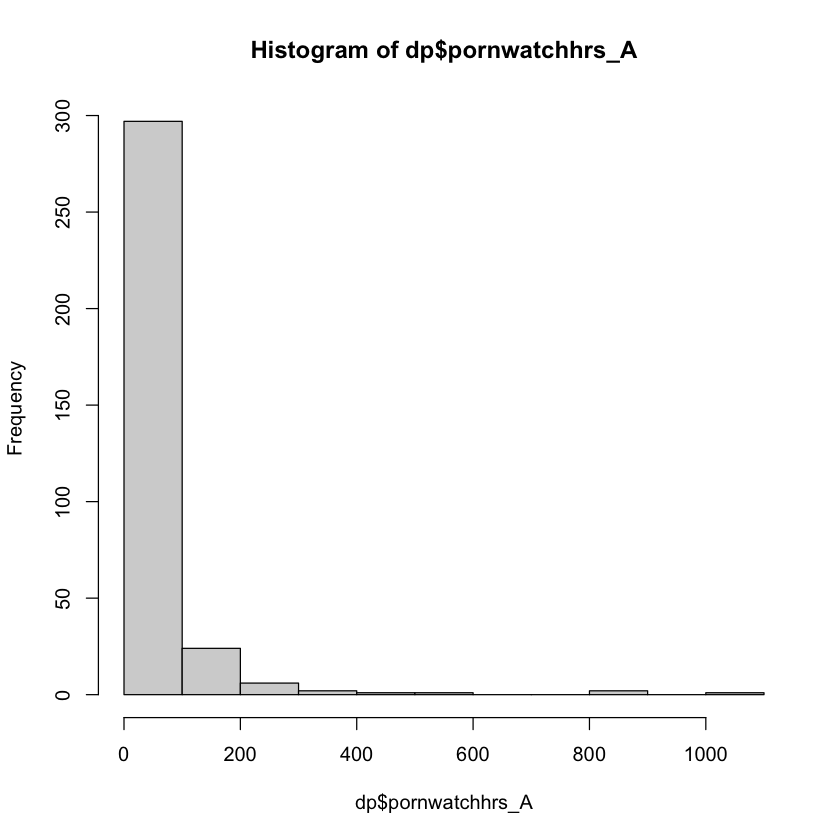

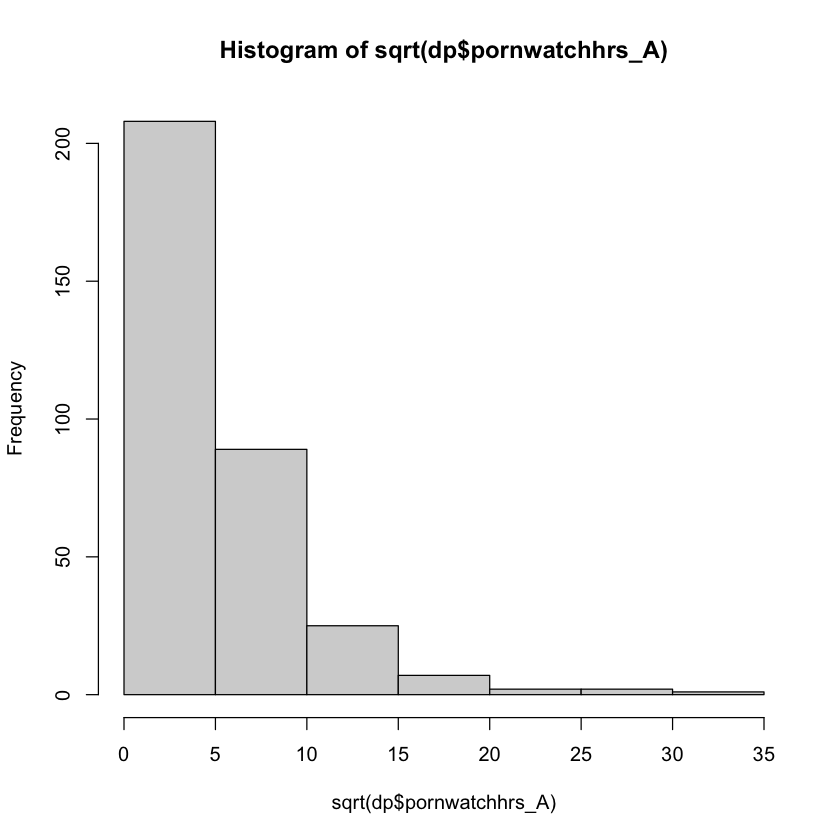

In [119]:
par(bg="white")
hist(dp$pornwatchhrs_A)
hist(sqrt(dp$pornwatchhrs_A))

In [248]:
dp = dp %>% mutate(male = ifelse(sex_A == "Male", 1, 0),
             female = ifelse(sex_A == "Female", 1, 0))

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0415209 (tol = 0.002, component 1)”


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: pornwatchhrs_A ~ norm_sssw_A + norm_sssw_P + (1 | id)
   Data: dp

     AIC      BIC   logLik deviance df.resid 
 12645.6  12660.9  -6318.8  12637.6      330 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-22.093  -2.195  -0.555   2.067  20.735 

Random effects:
 Groups Name        Variance Std.Dev.
 id     (Intercept) 4.475    2.115   
Number of obs: 334, groups:  id, 167

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.39129    0.16927  14.127  < 2e-16 ***
norm_sssw_A -0.40211    0.09101  -4.418 9.94e-06 ***
norm_sssw_P -0.10280    0.09073  -1.133    0.257    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) nrm__A
norm_sssw_A 0.012        
norm_sssw_P 0.011  0.974 

[1] "=============================================================================="


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: pornwatchhrs_A ~ sex_A + norm_sssw_A:sex_A + norm_sssw_P:sex_A -  
    1 + (male + female - 1 | id)
   Data: dp

     AIC      BIC   logLik deviance df.resid 
  2783.3   2817.6  -1382.7   2765.3      325 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.01781 -0.43291  0.00775  0.04928  0.24636 

Random effects:
 Groups Name   Variance Std.Dev. Corr
 id     male   5.808    2.410        
        female 6.680    2.585    0.54
Number of obs: 334, groups:  id, 167

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
sex_AFemale               0.8470     0.2474   3.424 0.000616 ***
sex_AMale                 2.4917     0.2017  12.352  < 2e-16 ***
sex_AFemale:norm_sssw_A  -1.2158     0.3383  -3.594 0.000326 ***
sex_AMale:norm_sssw_A    -0.2733     0.2802  -0.976 0.329300    
sex_AFemale:norm_sssw_P   0.5975     0.3135  

[1] "=============================================================================="


npar AIC       BIC       logLik    deviance  Chisq    Df Pr(>Chisq)
apimind 4    12645.632 12660.877 -6318.816 12637.632       NA NA NA        
apimd   9     2783.325  2817.625 -1382.662  2765.325 9872.307  5  0

[1] "=============================================================================="


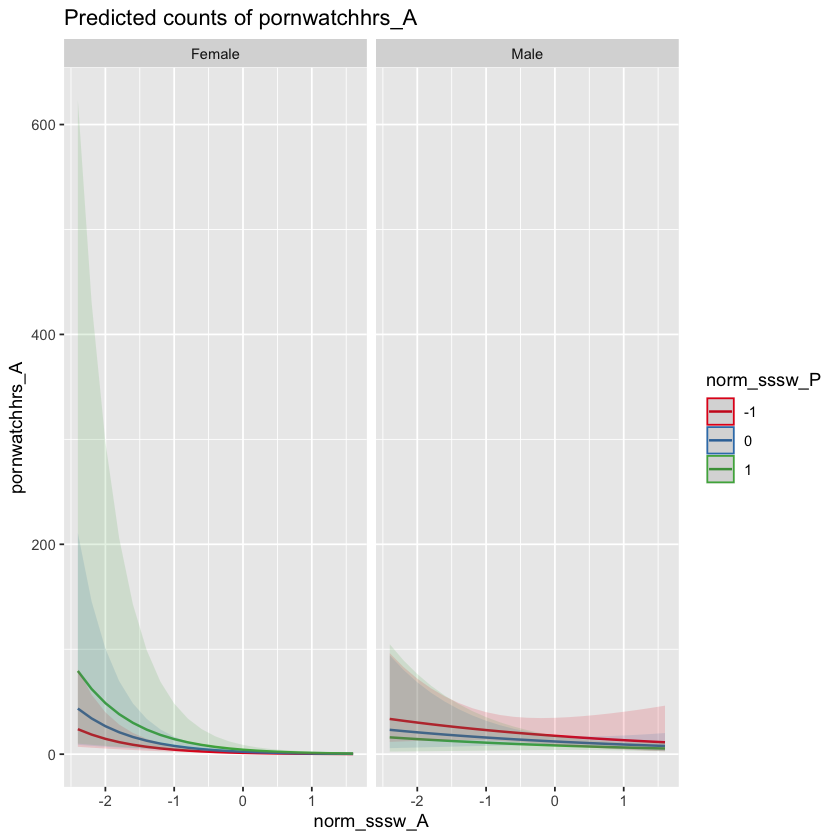

In [273]:
apimind = glmer(pornwatchhrs_A ~ norm_sssw_A + norm_sssw_P + (1|id),
               data = dp,
                family = poisson,
               na.action = na.omit)

apimd = glmer(pornwatchhrs_A ~ sex_A +  norm_sssw_A:sex_A +  norm_sssw_P:sex_A - 1 + (male + female - 1|id),
               data = dp,
                family = poisson,
               na.action = na.omit)
apimd2 = glmer(pornwatchhrs_A ~ sex_A + norm_sssw_A + norm_sssw_P + norm_sssw_A*sex_A + norm_sssw_P*sex_A + (male + female - 1|id),
               data = dp,
             family = poisson,
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("norm_sssw_A","norm_sssw_P","sex_A"),mdrt.values = "minmax")

Generalized least squares fit by maximum likelihood
  Model: pornwatchhrs_A ~ libcon_A + libcon_P 
  Data: dp 
       AIC     BIC    logLik
  4085.664 4104.72 -2037.832

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
       Rho 
0.06998984 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 59.13309 19.367657  3.053188  0.0024
libcon_A     7.19060  3.548543  2.026352  0.0435
libcon_P    -9.65762  3.548543 -2.721573  0.0068

 Correlation: 
         (Intr) lbcn_A
libcon_A -0.446       
libcon_P -0.446 -0.557

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-0.87227580 -0.40987648 -0.25312778  0.02972864  9.41984344 

Residual standard error: 108.1569 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: pornwatchhrs_A ~ sex_A + libcon_A:sex_A + libcon_P:sex_A - 1 
  Data: dp 
       AIC      BIC    logLik
  3780.155 3814.455 -1881.078

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
     Rho 
0.273356 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 4.414726 

Coefficients:
                         Value Std.Error    t-value p-value
sex_AFemale           17.71361   8.06736  2.1957143  0.0288
sex_AMale            102.64185  35.61516  2.8819705  0.0042
sex_AFemale:libcon_A   0.01648   1.68362  0.0097865  0.9922
sex_AMale:libcon_A     8.18133   6.77721  1.2071816  0.2282
sex_AFemale:libcon_P   0.24640   1.53514  0.1605063  0.8726
sex_AMale:libcon_P   -14.68940   7.43274 -1.9763092  0.0490

 Correlation: 
                     sx_AFm sx_AMl s_AF:_A s_AM:_A s_AF:_P
sex_AMale             0.273        

[1] "=============================================================================="


call                                                                                                                                                                                                              
apimind gls(model = pornwatchhrs_A ~ libcon_A + libcon_P, data = dp,     correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                               
apimd   gls(model = pornwatchhrs_A ~ sex_A + libcon_A:sex_A + libcon_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value     
apimind 1     5  4085.664 4104.720 -2037.832              NA           NA
apimd   2     9  3780.155 3814.455 -1881.078 1 vs 2 313.5089 1.319423e-66

[1] "=============================================================================="


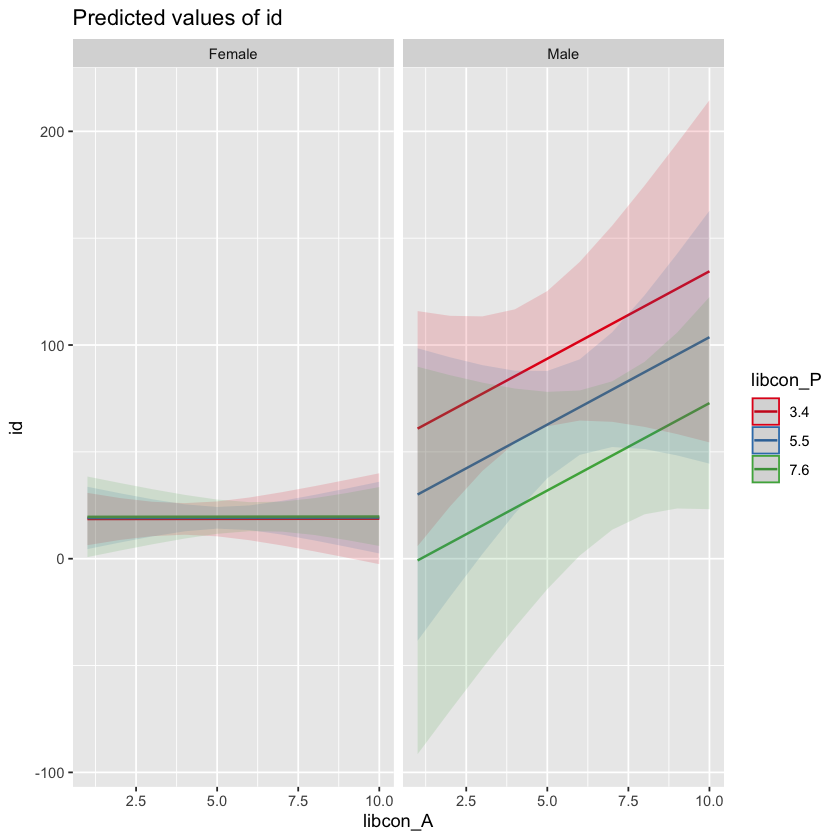

In [274]:


apimind = gls(pornwatchhrs_A ~ libcon_A + libcon_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(pornwatchhrs_A ~ sex_A +  libcon_A:sex_A +  libcon_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(pornwatchhrs_A ~ sex_A + libcon_A*sex_A + libcon_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("libcon_A","libcon_P","sex_A"),mdrt.values = "minmax")

Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ libcon_A + libcon_P 
  Data: dp 
       AIC      BIC    logLik
  2023.148 2042.204 -1006.574

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.2218976 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept)  5.223851 0.9548312  5.470968  0.0000
libcon_A     0.315155 0.1556801  2.024378  0.0437
libcon_P    -0.449398 0.1556801 -2.886674  0.0041

 Correlation: 
         (Intr) lbcn_A
libcon_A -0.502       
libcon_P -0.502 -0.440

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.2551125 -0.8200007 -0.1892996  0.5113213  5.5474878 

Residual standard error: 4.989719 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ sex_A + libcon_A:sex_A + libcon_P:sex_A -      1 
  Data: dp 
      AIC      BIC    logLik
  1925.06 1959.361 -953.5302

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.3844622 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.832088 

Coefficients:
                         Value Std.Error   t-value p-value
sex_AFemale           3.377701 0.7953711  4.246698  0.0000
sex_AMale             7.149988 1.4571902  4.906695  0.0000
sex_AFemale:libcon_A -0.058951 0.1659907 -0.355144  0.7227
sex_AMale:libcon_A    0.302134 0.2772889  1.089602  0.2767
sex_AFemale:libcon_P -0.019272 0.1513513 -0.127334  0.8988
sex_AMale:libcon_P   -0.542594 0.3041097 -1.784204  0.0753

 Correlation: 
                     sx_AFm sx_AMl s_AF:_A s_AM:_A s_AF:_P
sex_AMale             0.384    

[1] "=============================================================================="


call                                                                                                                                                                                                                    
apimind gls(model = sqrt(pornwatchhrs_A) ~ libcon_A + libcon_P, data = dp,     correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                               
apimd   gls(model = sqrt(pornwatchhrs_A) ~ sex_A + libcon_A:sex_A + libcon_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik     Test   L.Ratio  p-value     
apimind 1     5  2023.148 2042.204 -1006.5742              NA           NA
apimd   2     9  1925.060 1959.361  -953.5302 1 vs 2 106.0879 4.966565e-22

[1] "=============================================================================="


Model has sqrt-transformed response. Back-transforming predictions to original response scale. Standard errors are still on the sqrt-scale.



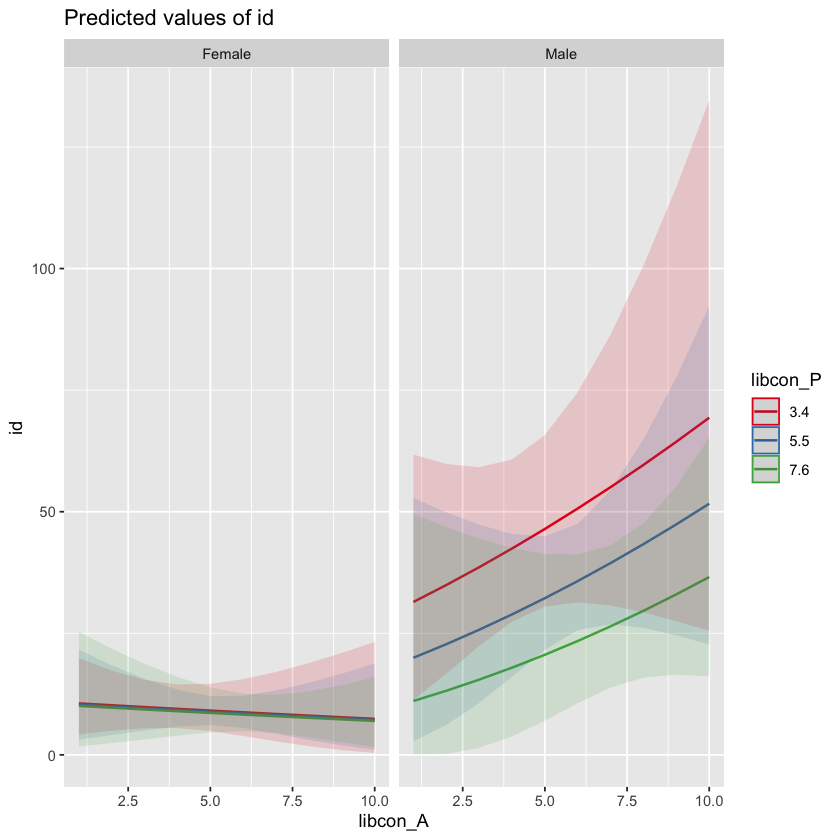

In [275]:


apimind = gls(sqrt(pornwatchhrs_A) ~ libcon_A + libcon_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(sqrt(pornwatchhrs_A)~ sex_A +  libcon_A:sex_A +  libcon_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(sqrt(pornwatchhrs_A) ~ sex_A + libcon_A*sex_A + libcon_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("libcon_A","libcon_P","sex_A"),mdrt.values = "minmax")

##### Uzależnienie

Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ pornuseaddiction_A + pornuseaddiction_P 
  Data: dp 
       AIC      BIC   logLik
  1908.922 1927.978 -949.461

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.2982339 

Coefficients:
                       Value Std.Error   t-value p-value
(Intercept)         0.985954 0.5619326  1.754576  0.0803
pornuseaddiction_A  3.239034 0.2657908 12.186406  0.0000
pornuseaddiction_P -0.757106 0.2657908 -2.848502  0.0047

 Correlation: 
                   (Intr) prns_A
pornuseaddiction_A -0.581       
pornuseaddiction_P -0.581 -0.128

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.8347743 -0.7232641 -0.1895736  0.4727263  6.2420549 

Residual standard error: 4.250542 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ sex_A + pornuseaddiction_A:sex_A + pornuseaddiction_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  1822.381 1856.682 -902.1907

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.4304024 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.683388 

Coefficients:
                                   Value Std.Error   t-value p-value
sex_AFemale                     0.869578 0.4820286  1.803997  0.0721
sex_AMale                       1.103732 0.8114411  1.360212  0.1747
sex_AFemale:pornuseaddiction_A  1.709319 0.3116738  5.484320  0.0000
sex_AMale:pornuseaddiction_A    3.809811 0.4512373  8.443031  0.0000
sex_AFemale:pornuseaddiction_P -0.048422 0.2680531 -0.180642  0.8568
sex_AMale:pornuseaddiction_P   -0.801705 0.5246679 -1.528024  0.1275

 Correlation:

[1] "=============================================================================="


call                                                                                                                                                                                                                                            
apimind gls(model = sqrt(pornwatchhrs_A) ~ pornuseaddiction_A + pornuseaddiction_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = sqrt(pornwatchhrs_A) ~ sex_A + pornuseaddiction_A:sex_A +     pornuseaddiction_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value     
apimind 1     5  1908.922 1927.978 -949.4610              NA           NA
apimd   2     9  1822.381 1856.682 -902.1907 1 vs 2 94.54059 1.427092e-19

[1] "=============================================================================="


Model has sqrt-transformed response. Back-transforming predictions to original response scale. Standard errors are still on the sqrt-scale.



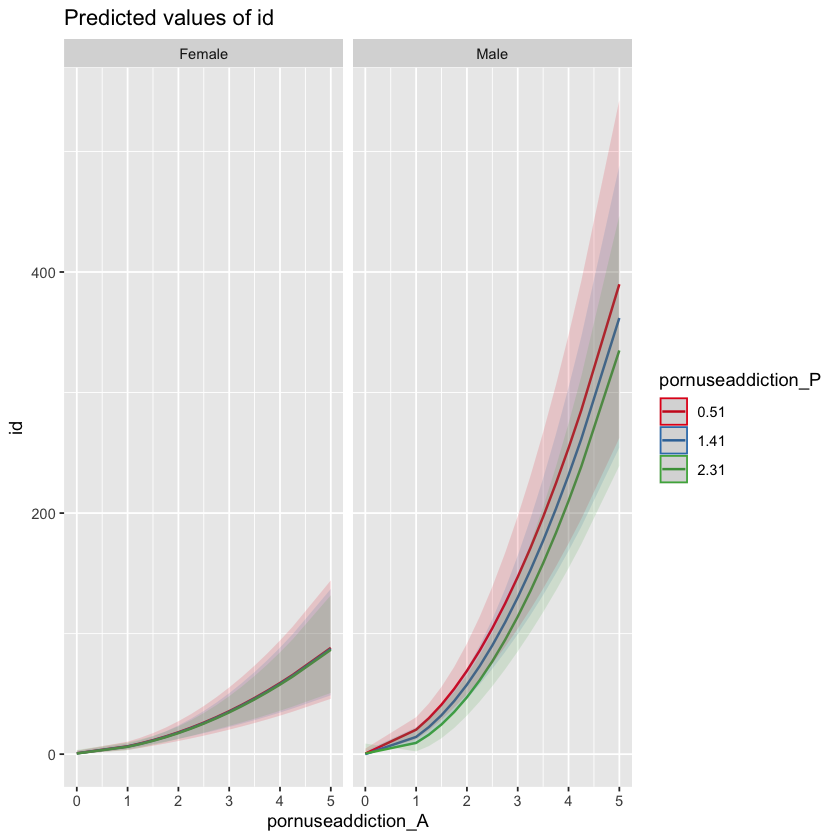

In [276]:


apimind = gls(sqrt(pornwatchhrs_A) ~ pornuseaddiction_A + pornuseaddiction_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(sqrt(pornwatchhrs_A)~ sex_A +  pornuseaddiction_A:sex_A +  pornuseaddiction_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(sqrt(pornwatchhrs_A) ~ sex_A + pornuseaddiction_A*sex_A + pornuseaddiction_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("pornuseaddiction_A","pornuseaddiction_P","sex_A"),mdrt.values = "minmax")

##### podskale PCI

Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ c_pcicuriousity_A + c_pcicuriousity_P 
  Data: dp 
       AIC      BIC    logLik
  1765.883 1784.368 -877.9414

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.1027105 

Coefficients:
                      Value Std.Error   t-value p-value
(Intercept)        4.921418 0.2823261 17.431676  0.0000
c_pcicuriousity_A  1.895538 0.2456618  7.716049  0.0000
c_pcicuriousity_P -0.085443 0.2456618 -0.347807  0.7282

 Correlation: 
                  (Intr) c_pc_A
c_pcicuriousity_A -0.008       
c_pcicuriousity_P -0.008 -0.327

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.7159778 -0.5932924 -0.1788279  0.3049772  5.9098838 

Residual standard error: 4.617369 
Degrees of freedom: 298 total; 295 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ sex_A + c_pcicuriousity_A:sex_A + c_pcicuriousity_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  1675.896 1709.169 -828.9478

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.2449916 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.961401 

Coefficients:
                                  Value Std.Error   t-value p-value
sex_AFemale                    3.796397 0.2642686 14.365674  0.0000
sex_AMale                      6.374041 0.5183367 12.297106  0.0000
sex_AFemale:c_pcicuriousity_A  1.435616 0.2277426  6.303680  0.0000
sex_AMale:c_pcicuriousity_A    1.485246 0.4947995  3.001714  0.0029
sex_AFemale:c_pcicuriousity_P -0.274076 0.2522685 -1.086446  0.2782
sex_AMale:c_pcicuriousity_P    0.897565 0.4466944  2.009350  0.0454

 Correlation: 
       

[1] "=============================================================================="


call                                                                                                                                                                                                                                          
apimind gls(model = sqrt(pornwatchhrs_A) ~ c_pcicuriousity_A + c_pcicuriousity_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = sqrt(pornwatchhrs_A) ~ sex_A + c_pcicuriousity_A:sex_A +     c_pcicuriousity_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value     
apimind 1     5  1765.883 1784.368 -877.9414              NA           NA
apimd   2     9  1675.896 1709.169 -828.9478 1 vs 2 97.98723 2.637902e-20

[1] "=============================================================================="


Model has sqrt-transformed response. Back-transforming predictions to original response scale. Standard errors are still on the sqrt-scale.



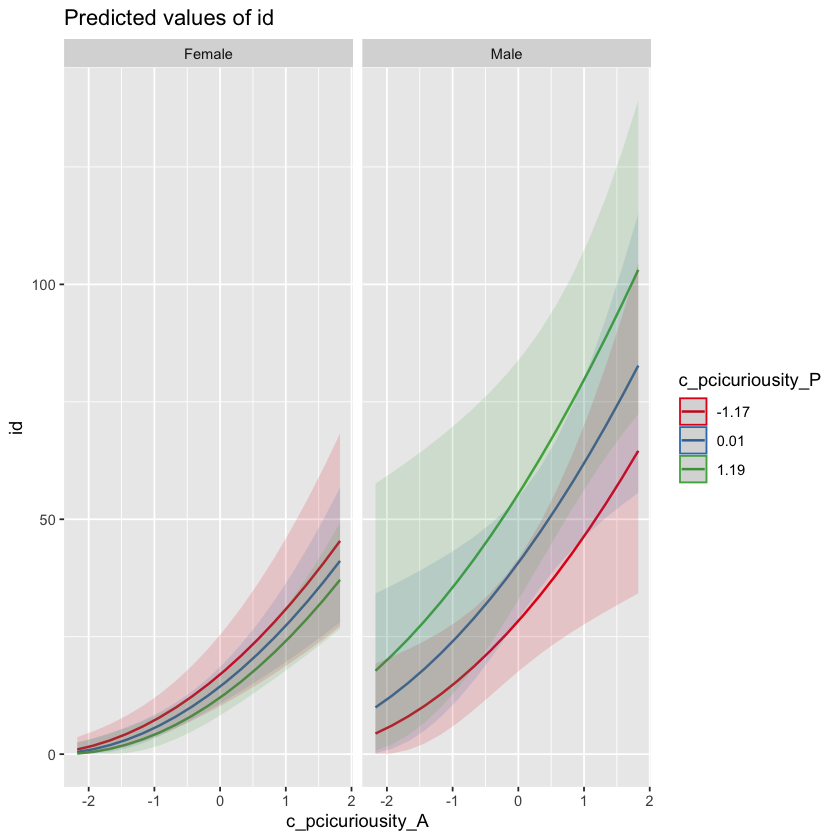

In [277]:
apimind = gls(sqrt(pornwatchhrs_A) ~ c_pcicuriousity_A + c_pcicuriousity_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(sqrt(pornwatchhrs_A) ~ sex_A +  c_pcicuriousity_A:sex_A +  c_pcicuriousity_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(sqrt(pornwatchhrs_A) ~ sex_A + c_pcicuriousity_A*sex_A + c_pcicuriousity_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("c_pcicuriousity_A","c_pcicuriousity_P","sex_A"),mdrt.values = "minmax")

Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ c_pciavoidance_A + c_pciavoidance_P 
  Data: dp 
     AIC      BIC    logLik
  1717.5 1735.986 -853.7502

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.2043339 

Coefficients:
                     Value Std.Error   t-value p-value
(Intercept)       4.906094 0.2742611 17.888404  0.0000
c_pciavoidance_A  2.603364 0.2295979 11.338798  0.0000
c_pciavoidance_P -0.567263 0.2295979 -2.470679  0.0141

 Correlation: 
                 (Intr) c_pc_A
c_pciavoidance_A -0.012       
c_pciavoidance_P -0.012 -0.238

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.1979823 -0.5850175 -0.2086070  0.3994076  6.1319288 

Residual standard error: 4.29159 
Degrees of freedom: 298 total; 295 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ sex_A + c_pciavoidance_A:sex_A + c_pciavoidance_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  1648.068 1681.342 -815.0338

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.3109637 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.766903 

Coefficients:
                                 Value Std.Error   t-value p-value
sex_AFemale                   3.665657 0.2636629 13.902818  0.0000
sex_AMale                     5.640184 0.4658666 12.106864  0.0000
sex_AFemale:c_pciavoidance_A  1.420795 0.2587127  5.491784  0.0000
sex_AMale:c_pciavoidance_A    2.951838 0.4178760  7.063908  0.0000
sex_AFemale:c_pciavoidance_P -0.011521 0.2365020 -0.048715  0.9612
sex_AMale:c_pciavoidance_P   -0.403577 0.4571202 -0.882868  0.3780

 Correlation: 
                

[1] "=============================================================================="


call                                                                                                                                                                                                                                        
apimind gls(model = sqrt(pornwatchhrs_A) ~ c_pciavoidance_A + c_pciavoidance_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = sqrt(pornwatchhrs_A) ~ sex_A + c_pciavoidance_A:sex_A +     c_pciavoidance_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value     
apimind 1     5  1717.500 1735.986 -853.7502              NA           NA
apimd   2     9  1648.068 1681.342 -815.0338 1 vs 2 77.43273 6.090671e-16

[1] "=============================================================================="


Model has sqrt-transformed response. Back-transforming predictions to original response scale. Standard errors are still on the sqrt-scale.



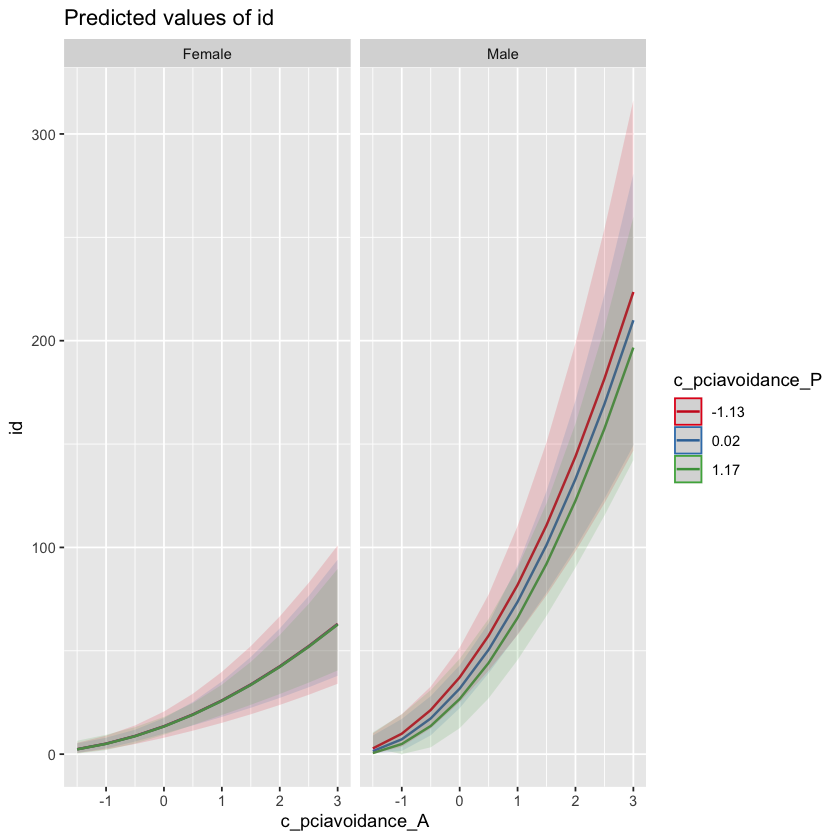

In [279]:
apimind = gls(sqrt(pornwatchhrs_A) ~ c_pciavoidance_A + c_pciavoidance_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(sqrt(pornwatchhrs_A) ~ sex_A +  c_pciavoidance_A:sex_A +  c_pciavoidance_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(sqrt(pornwatchhrs_A) ~ sex_A + c_pciavoidance_A*sex_A + c_pciavoidance_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("c_pciavoidance_A","c_pciavoidance_P","sex_A"),mdrt.values = "minmax")

Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ c_pcipleasure_A + c_pcipleasure_P 
  Data: dp 
       AIC      BIC    logLik
  1750.936 1769.421 -870.4679

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
       Rho 
0.09769204 

Coefficients:
                    Value Std.Error   t-value p-value
(Intercept)      4.873556 0.2747943 17.735286  0.0000
c_pcipleasure_A  1.861680 0.2131734  8.733174  0.0000
c_pcipleasure_P -0.142064 0.2131734 -0.666425  0.5057

 Correlation: 
                (Intr) c_pc_A
c_pcipleasure_A -0.020       
c_pcipleasure_P -0.020 -0.362

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.5915699 -0.6122148 -0.2343053  0.3850079  6.1008570 

Residual standard error: 4.501866 
Degrees of freedom: 298 total; 295 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ sex_A + c_pcipleasure_A:sex_A + c_pcipleasure_P:sex_A -      1 
  Data: dp 
      AIC      BIC    logLik
  1656.89 1690.164 -819.4451

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
     Rho 
0.253617 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
Female   Male 
1.0000 1.9708 

Coefficients:
                               Value Std.Error   t-value p-value
sex_AFemale                 3.504706 0.2389844 14.664999  0.0000
sex_AMale                   6.064098 0.4709904 12.875204  0.0000
sex_AFemale:c_pcipleasure_A 1.209608 0.1857175  6.513161  0.0000
sex_AMale:c_pcipleasure_A   2.072803 0.4100916  5.054487  0.0000
sex_AFemale:c_pcipleasure_P 0.082687 0.2080838  0.397373  0.6914
sex_AMale:c_pcipleasure_P   0.135980 0.3660121  0.371518  0.7105

 Correlation: 
                            sx_AFm sx_AMl s_

[1] "=============================================================================="


call                                                                                                                                                                                                                                      
apimind gls(model = sqrt(pornwatchhrs_A) ~ c_pcipleasure_A + c_pcipleasure_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = sqrt(pornwatchhrs_A) ~ sex_A + c_pcipleasure_A:sex_A +     c_pcipleasure_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value     
apimind 1     5  1750.936 1769.421 -870.4679              NA           NA
apimd   2     9  1656.890 1690.164 -819.4451 1 vs 2 102.0455 3.608178e-21

[1] "=============================================================================="


Model has sqrt-transformed response. Back-transforming predictions to original response scale. Standard errors are still on the sqrt-scale.



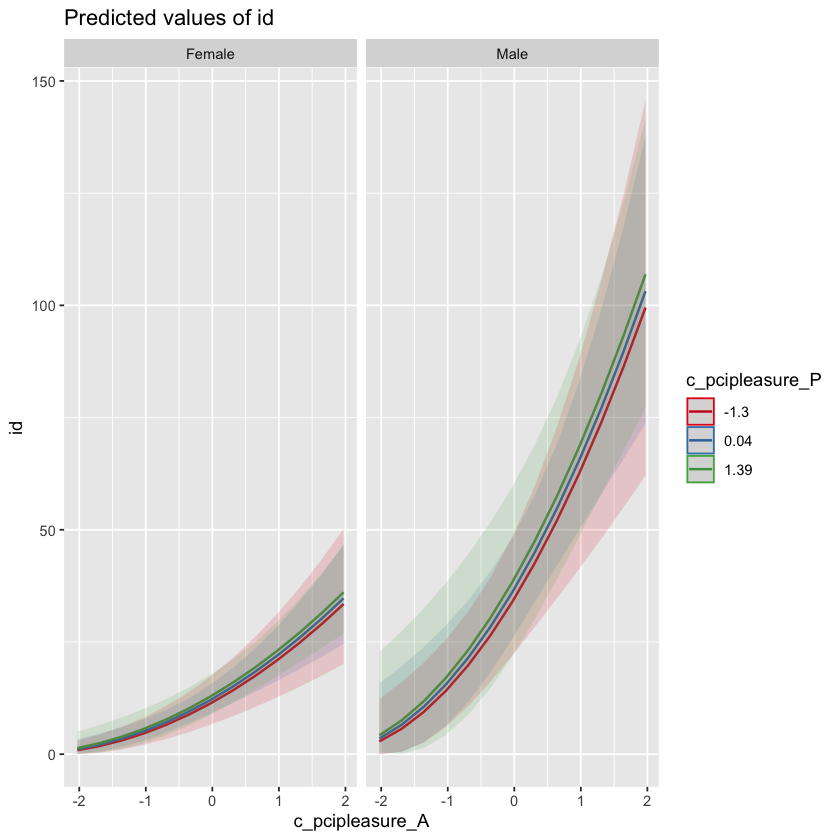

In [280]:
apimind = gls(sqrt(pornwatchhrs_A) ~ c_pcipleasure_A + c_pcipleasure_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(sqrt(pornwatchhrs_A) ~ sex_A +  c_pcipleasure_A:sex_A +  c_pcipleasure_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

apimd2 = gls(sqrt(pornwatchhrs_A) ~ sex_A + c_pcipleasure_A*sex_A + c_pcipleasure_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("c_pcipleasure_A","c_pcipleasure_P","sex_A"),mdrt.values = "minmax")

##### pornomoralność

Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ pornusemoral_A + pornusemoral_P 
  Data: dp 
       AIC      BIC    logLik
  1999.722 2018.778 -994.8612

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.1641181 

Coefficients:
                   Value Std.Error   t-value p-value
(Intercept)     7.921518 0.7598361 10.425299  0.0000
pornusemoral_A -1.483305 0.2898729 -5.117087  0.0000
pornusemoral_P  0.141211 0.2898729  0.487149  0.6265

 Correlation: 
               (Intr) prns_A
pornusemoral_A -0.440       
pornusemoral_P -0.440 -0.549

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.3853903 -0.6465992 -0.2233521  0.3471317  6.0034781 

Residual standard error: 4.78992 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: sqrt(pornwatchhrs_A) ~ sex_A + pornusemoral_A:sex_A + pornusemoral_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  1898.732 1933.033 -940.3661

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.3245694 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.872031 

Coefficients:
                               Value Std.Error   t-value p-value
sex_AFemale                 5.330444 0.6349086  8.395610  0.0000
sex_AMale                  10.605274 1.1885685  8.922728  0.0000
sex_AFemale:pornusemoral_A -1.136182 0.2867722 -3.961968  0.0001
sex_AMale:pornusemoral_A   -0.648426 0.5921874 -1.094968  0.2743
sex_AFemale:pornusemoral_P  0.319850 0.3163342  1.011114  0.3127
sex_AMale:pornusemoral_P   -1.109445 0.5368464 -2.066597  0.0396

 Correlation: 
                           sx_AFm 

[1] "=============================================================================="


call                                                                                                                                                                                                                                    
apimind gls(model = sqrt(pornwatchhrs_A) ~ pornusemoral_A + pornusemoral_P,     data = dp, correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                                   
apimd   gls(model = sqrt(pornwatchhrs_A) ~ sex_A + pornusemoral_A:sex_A +     pornusemoral_P:sex_A - 1, data = dp, correlation = corCompSymm(form = ~1 |     id), weights = varIdent(form = ~1 | sex_A), method = "ML",     na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value    
apimind 1     5  1999.722 2018.778 -994.8612              NA          NA
apimd   2     9  1898.732 1933.033 -940.3661 1 vs 2 108.9901 1.19495e-22

[1] "=============================================================================="


Model has sqrt-transformed response. Back-transforming predictions to original response scale. Standard errors are still on the sqrt-scale.



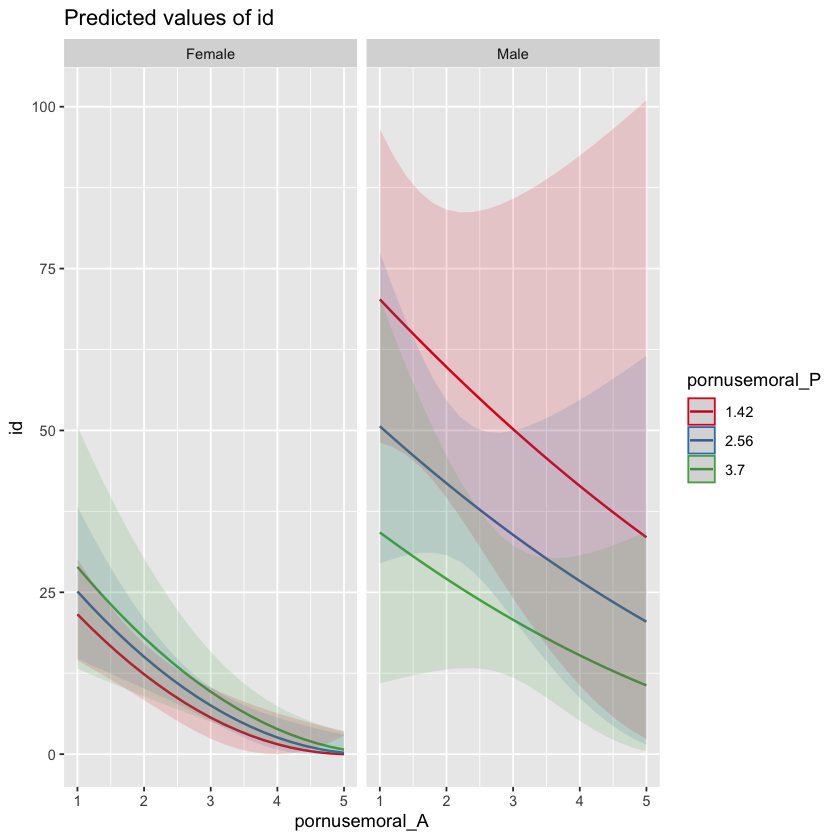

In [281]:
apimind = gls(sqrt(pornwatchhrs_A) ~ pornusemoral_A + pornusemoral_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(sqrt(pornwatchhrs_A) ~ sex_A + pornusemoral_A:sex_A + pornusemoral_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(sqrt(pornwatchhrs_A) ~ sex_A + pornusemoral_A*sex_A + pornusemoral_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("pornusemoral_A","pornusemoral_P","sex_A"))

##### pornomoralnosc + poisson

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.09216 (tol = 0.002, component 1)”


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: pornwatchhrs_A ~ pornusemoral_A + pornusemoral_P + (1 | id)
   Data: dp

     AIC      BIC   logLik deviance df.resid 
 12450.6  12465.9  -6221.3  12442.6      330 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-24.1158  -2.1116  -0.5093   2.0385  26.1178 

Random effects:
 Groups Name        Variance Std.Dev.
 id     (Intercept) 4.129    2.032   
Number of obs: 334, groups:  id, 167

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.64728    0.43521  10.678  < 2e-16 ***
pornusemoral_A -0.64082    0.08135  -7.877 3.35e-15 ***
pornusemoral_P -0.25032    0.08129  -3.079  0.00208 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) prns_A
pornusmrl_A -0.919       
pornusmrl_P -0.920  0.969

[1] "=============================================================================="


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: 
pornwatchhrs_A ~ sex_A + pornusemoral_A:sex_A + pornusemoral_P:sex_A -  
    1 + (male + female - 1 | id)
   Data: dp

     AIC      BIC   logLik deviance df.resid 
  2758.8   2793.1  -1370.4   2740.8      325 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.00759 -0.45835  0.00248  0.04504  0.27613 

Random effects:
 Groups Name   Variance Std.Dev. Corr
 id     male   5.271    2.296        
        female 6.064    2.462    0.46
Number of obs: 334, groups:  id, 167

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
sex_AFemale                 3.69156    0.55995   6.593 4.32e-11 ***
sex_AMale                   5.03135    0.50629   9.938  < 2e-16 ***
sex_AFemale:pornusemoral_A -1.05455    0.26401  -3.994 6.49e-05 ***
sex_AMale:pornusemoral_A   -0.74414    0.25916  -2.871  0.00409 ** 
sex_AFemale:pornusemora

[1] "=============================================================================="


npar AIC       BIC       logLik    deviance  Chisq    Df Pr(>Chisq)
apimind 4    12450.644 12465.889 -6221.322 12442.644       NA NA NA        
apimd   9     2758.831  2793.131 -1370.415  2740.831 9701.813  5  0

[1] "=============================================================================="


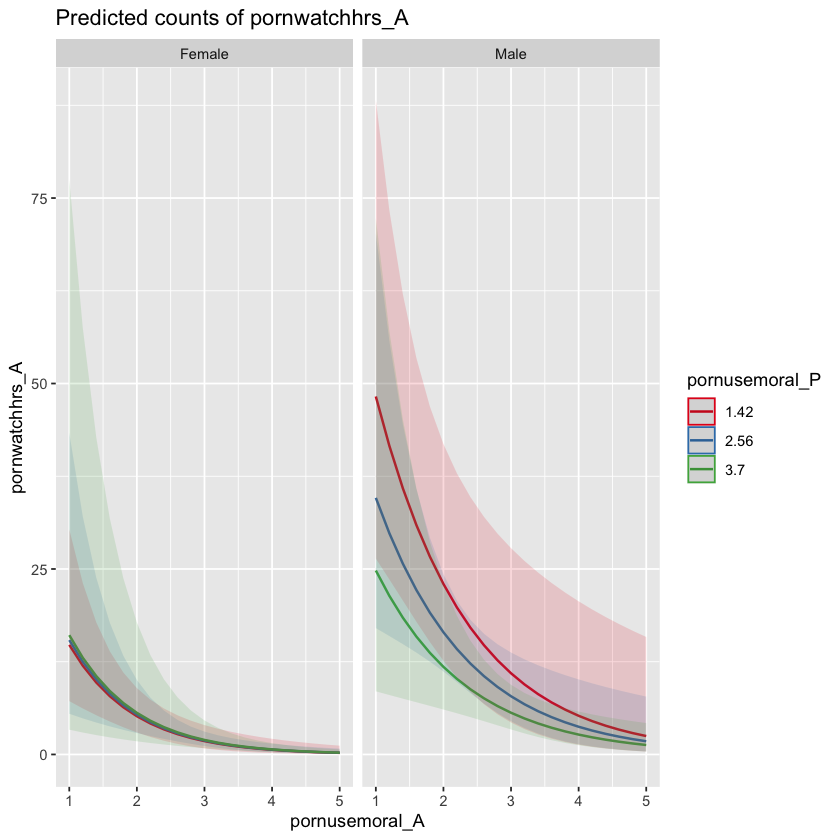

In [283]:
apimind = glmer(pornwatchhrs_A ~ pornusemoral_A + pornusemoral_P + (1|id),
               data = dp,
                family = poisson,
               na.action = na.omit)

apimd = glmer(pornwatchhrs_A ~ sex_A +  pornusemoral_A:sex_A +  pornusemoral_P:sex_A - 1 + (male + female - 1|id),
               data = dp,
                family = poisson,
               na.action = na.omit)
apimd2 = glmer(pornwatchhrs_A ~ sex_A + pornusemoral_A + pornusemoral_P + pornusemoral_A*sex_A + pornusemoral_P*sex_A + (male + female - 1|id),
               data = dp,
             family = poisson,
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("pornusemoral_A","pornusemoral_P","sex_A"),mdrt.values = "minmax")

Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ pornfirst_A + pornfirst_P 
  Data: dp 
       AIC      BIC    logLik
  824.3449 843.4006 -407.1725

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7400373 

Coefficients:
                   Value  Std.Error    t-value p-value
(Intercept) -0.002611853 0.25367158 -0.0102962  0.9918
pornfirst_A -0.001278354 0.00997193 -0.1281952  0.8981
pornfirst_P  0.001465958 0.00997193  0.1470084  0.8832

 Correlation: 
            (Intr) prnf_A
pornfirst_A -0.839       
pornfirst_P -0.839  0.533

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.27523540 -0.74189546  0.03206546  0.78429830  1.63958390 

Residual standard error: 0.9984695 
Degrees of freedom: 334 total; 331 residual

[1] "=============================================================================="


Generalized least squares fit by maximum likelihood
  Model: norm_sssw_A ~ sex_A + pornfirst_A:sex_A + pornfirst_P:sex_A -      1 
  Data: dp 
       AIC      BIC    logLik
  829.5309 863.8312 -405.7655

Correlation Structure: Compound symmetry
 Formula: ~1 | id 
 Parameter estimate(s):
      Rho 
0.7431338 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | sex_A 
 Parameter estimates:
  Female     Male 
1.000000 1.072236 

Coefficients:
                              Value  Std.Error     t-value p-value
sex_AFemale             -0.04352709 0.28306818 -0.15376893  0.8779
sex_AMale                0.00678878 0.30351586  0.02236714  0.9822
sex_AFemale:pornfirst_A -0.00252511 0.01365228 -0.18495871  0.8534
sex_AMale:pornfirst_A    0.00195258 0.02168623  0.09003772  0.9283
sex_AFemale:pornfirst_P  0.00373098 0.02022524  0.18447127  0.8538
sex_AMale:pornfirst_P   -0.00039016 0.01463846 -0.02665339  0.9788

 Correlation: 
                        sx_AFm sx_A

[1] "=============================================================================="


call                                                                                                                                                                                                                 
apimind gls(model = norm_sssw_A ~ pornfirst_A + pornfirst_P, data = dp,     correlation = corCompSymm(form = ~1 | id), method = "ML",     na.action = na.omit)                                                               
apimd   gls(model = norm_sssw_A ~ sex_A + pornfirst_A:sex_A + pornfirst_P:sex_A -     1, data = dp, correlation = corCompSymm(form = ~1 | id),     weights = varIdent(form = ~1 | sex_A), method = "ML", na.action = na.omit)
        Model df AIC      BIC      logLik    Test   L.Ratio  p-value
apimind 1     5  824.3449 843.4006 -407.1725              NA      NA
apimd   2     9  829.5309 863.8312 -405.7655 1 vs 2 2.813992 0.58942

[1] "=============================================================================="


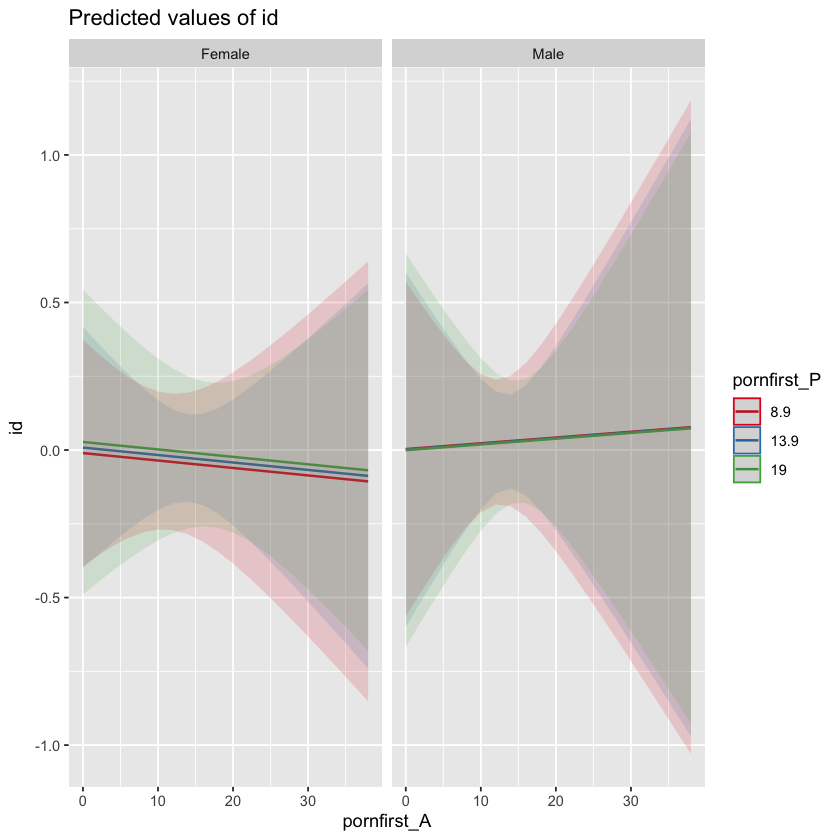

In [284]:

apimind = gls(norm_sssw_A ~ pornfirst_A + pornfirst_P,
               data = dp,
               correlation = corCompSymm(form=~1|id), method='ML',
               na.action = na.omit)

apimd = gls(norm_sssw_A ~ sex_A +  pornfirst_A:sex_A +  pornfirst_P:sex_A - 1,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)
apimd2 = gls(norm_sssw_A ~ sex_A + pornfirst_A*sex_A + pornfirst_P*sex_A,
               data = dp,
               correlation = corCompSymm(form=~1|id), 
               weights = varIdent(form=~1|sex_A), method='ML',
               na.action = na.omit)

summary(apimind)
print("==============================================================================")
summary(apimd)
print("==============================================================================")
anova(apimind,apimd)
print("==============================================================================")
plot_model(apimd2, type = 'pred', terms=c("pornfirst_A","pornfirst_P","sex_A"),mdrt.values = "minmax")

In [224]:
par(bg="white")
dp$pornwatch = as.integer(dp$pornwatchhrs_A > 0)

In [227]:
logreg = glmer(pornwatch ~ norm_sssw_A + norm_sssw_P + (1|id),
               data = dp,
               family = binomial,
                na.action = na.omit)

In [228]:
summary(logreg)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pornwatch ~ norm_sssw_A + norm_sssw_P + (1 | id)
   Data: dp

     AIC      BIC   logLik deviance df.resid 
   401.6    416.9   -196.8    393.6      330 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7552 -0.6281  0.3304  0.4475  1.1856 

Random effects:
 Groups Name        Variance Std.Dev.
 id     (Intercept) 2.881    1.697   
Number of obs: 334, groups:  id, 167

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2084     0.2590   4.665 3.08e-06 ***
norm_sssw_A  -0.6384     0.2457  -2.599  0.00936 ** 
norm_sssw_P   0.1942     0.2334   0.832  0.40554    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) nrm__A
norm_sssw_A -0.230       
norm_sssw_P  0.068 -0.556

In [242]:
dp = dp %>% mutate(male = ifelse(sex_A == "Male", 1, 0),
             female = ifelse(sex_A == "Female", 1, 0))

logregdist = glmer(pornwatch ~ norm_sssw_A*sex_A +  norm_sssw_P*sex_A + (male + female -1 |id),
               data = dp,
               family = binomial,
                na.action = na.omit)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.992507 (tol = 0.002, component 1)”


In [243]:
summary(logregdist)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pornwatch ~ norm_sssw_A * sex_A + norm_sssw_P * sex_A + (male +  
    female - 1 | id)
   Data: dp

     AIC      BIC   logLik deviance df.resid 
   359.6    393.9   -170.8    341.6      325 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.12094 -0.21712  0.01013  0.58593  1.44105 

Random effects:
 Groups Name   Variance  Std.Dev. Corr
 id     male   223.53278 14.9510      
        female   0.03879  0.1969  0.99
Number of obs: 334, groups:  id, 167

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)             0.4006     0.1649   2.430  0.01509 *  
norm_sssw_A            -0.8099     0.2762  -2.933  0.00336 ** 
sex_AMale               7.9668     1.1402   6.987  2.8e-12 ***
norm_sssw_P             0.4592     0.2516   1.825  0.06797 .  
norm_sssw_A:sex_AMale   0.4146     1.0103   0.410  0.68153    